In [ ]:
# import liblaries
#liblaries for requests
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#liblaries for ML
from scipy import stats
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.linear_model import LinearRegression

In [ ]:
URL = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv'

req = requests.get(URL)

req.headers

{'Connection': 'keep-alive', 'Content-Length': '154500', 'Cache-Control': 'max-age=300', 'Content-Security-Policy': "default-src 'none'; style-src 'unsafe-inline'; sandbox", 'Content-Type': 'text/plain; charset=utf-8', 'ETag': 'W/"d901e6fe53bcc43168991cd6d6156d10a1dc274f9088d941dfbe6520d54137fc"', 'Strict-Transport-Security': 'max-age=31536000', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'deny', 'X-XSS-Protection': '1; mode=block', 'X-GitHub-Request-Id': '685D:2E4F2D:7F15D:88352:667582C0', 'Content-Encoding': 'gzip', 'Accept-Ranges': 'bytes', 'Date': 'Fri, 21 Jun 2024 13:40:17 GMT', 'Via': '1.1 varnish', 'X-Served-By': 'cache-bur-kbur8200043-BUR', 'X-Cache': 'MISS', 'X-Cache-Hits': '0', 'X-Timer': 'S1718977217.868480,VS0,VE304', 'Vary': 'Authorization,Accept-Encoding,Origin', 'Access-Control-Allow-Origin': '*', 'Cross-Origin-Resource-Policy': 'cross-origin', 'X-Fastly-Request-ID': 'd22f8f119d6c69d20ca6abf8fbd84ccfdd7a4f0d', 'Expires': 'Fri, 21 Jun 2024 13:45:17 GMT', 'Sour

In [ ]:
#status code
match req.status_code:
    case 200:
        print(req)
    case 404:
        raise 'Problem with connection'
    case _ :
        raise f'Something wrong {req.status_code}'
print(req.status_code)

<Response [200]>
200


In [ ]:
def check_status_code(req):
    match req.status_code:
        case 200:
            print ('All ok')
        case 404:
            raise Exception ('Error connect')
        case _ as e:
            print (f'unknow error: {e}')



In [ ]:
check_status_code(req)

All ok


In [ ]:
df = pd.read_csv(URL, sep = ',')
print(df)

      Unnamed: 0   item_id                   name       category   price  \
0              0  90420332               FREKVENS  Bar furniture   265.0   
1              1    368814              NORDVIKEN  Bar furniture   995.0   
2              2   9333523  NORDVIKEN / NORDVIKEN  Bar furniture  2095.0   
3              3  80155205                   STIG  Bar furniture    69.0   
4              4  30180504                NORBERG  Bar furniture   225.0   
...          ...       ...                    ...            ...     ...   
3689        3689  99157902                ELVARLI      Wardrobes   750.0   
3690        3690   9158152                ELVARLI      Wardrobes  1572.0   
3691        3691  59157541                ELVARLI      Wardrobes   924.0   
3692        3692  89157573                ELVARLI      Wardrobes  2745.0   
3693        3693  69157376                ELVARLI      Wardrobes  1231.0   

         old_price  sellable_online  \
0     No old price             True   
1     No 

In [ ]:
df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [ ]:
df.tail()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
3689,3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0
3693,3693,69157376,ELVARLI,Wardrobes,1231.0,"SR 1,535",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0


In [ ]:
df.sample(5)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
535,535,99217755,BILLY / OXBERG,Bookcases & shelving units,995.0,No old price,True,https://www.ikea.com/sa/en/p/billy-oxberg-book...,Yes,"Bookcase, 80x30x237 cm",Gillis Lundgren/IKEA of Sweden,30.0,237.0,80.0
145,145,10247973,SVÄRTA,Beds,895.0,No old price,True,https://www.ikea.com/sa/en/p/svaerta-bunk-bed-...,No,"Bunk bed frame, 90x200 cm",Tord Björklund,NaN,159.0,97.0
1776,1776,40273593,FLISAT,Children's furniture,89.0,No old price,True,https://www.ikea.com/sa/en/p/flisat-childrens-...,No,"Children's stool, 24x24x28 cm",S Fager/J Karlsson,24.0,NaN,24.0
1643,1643,353761,KLIMPEN,Chests of drawers & drawer units,200.0,No old price,True,https://www.ikea.com/sa/en/p/klimpen-add-on-un...,Yes,"Add-on unit, 58x23 cm",Tina Christensen,23.0,23.0,58.0
223,223,50456417,SLÄKT,Beds,75.0,No old price,False,https://www.ikea.com/sa/en/p/slaekt-headboard-...,Yes,Headboard,Ebba Strandmark,NaN,40.0,90.0


In [ ]:
df.shape

(3694, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


In [ ]:
df.describe()

,Unnamed: 0,item_id,price,depth,height,width
count,3694.000000,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,1846.500000,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,1066.510275,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,0.000000,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,923.250000,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,1846.500000,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,2769.750000,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,3693.000000,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


In [ ]:
df.columns

Index(['Unnamed: 0', 'item_id', 'name', 'category', 'price', 'old_price',
       'sellable_online', 'link', 'other_colors', 'short_description',
       'designer', 'depth', 'height', 'width'],
      dtype='object')

In [ ]:
df.duplicated(subset=['name', 'category', 'price', 'old_price',
       'sellable_online', 'link', 'other_colors', 'short_description',
       'designer', 'depth', 'height', 'width'])

0       False
1       False
2       False
3       False
4       False
        ...  
3689    False
3690    False
3691    False
3692    False
3693    False
Length: 3694, dtype: bool

In [ ]:
df.isnull().sum()

Unnamed: 0              0
item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [ ]:
df['Unnamed: 0'].nunique()

3694

In [ ]:
df['item_id'].nunique()

2962

In [ ]:
df['link'].nunique()

2962

In [ ]:
df = df.drop_duplicates(['item_id']).reset_index(drop=True)

In [ ]:
df.shape

(2962, 14)

In [ ]:
df = df.drop(['item_id', 'link', 'Unnamed: 0'], axis= 1)
df.columns

Index(['name', 'category', 'price', 'old_price', 'sellable_online',
       'other_colors', 'short_description', 'designer', 'depth', 'height',
       'width'],
      dtype='object')

In [ ]:
df['category'].unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

In [ ]:
df['category'].nunique()

17

In [ ]:
df['designer'].unique()

array(['Nicholai Wiig Hansen', 'Francis Cayouette', 'Henrik Preutz',
       'Marcus Arvonen', 'Carina Bengs', 'K Hagberg/M Hagberg',
       'Sarah Fager', 'Ehlén Johansson', 'Nike Karlsson',
       'Maja Ganszyniec', 'Karl Malmvall',
       'John/Jonas/Petrus/Paul/Caroline', 'Nike Karlsson/Maja Ganszyniec',
       'J Karlsson/N Karlsson', 'IKEA of Sweden/Karl Malmvall',
       'IKEA of Sweden', 'Nike Karlsson/J Karlsson/N Karlsson',
       'Ola Wihlborg', 'IKEA of Sweden/Tina Christensen',
       'IKEA of Sweden/K Hagberg/M Hagberg',
       'Ola Wihlborg/IKEA of Sweden',
       '504.689.53 Small and easy-to-place chair-bed which can easily be converted into a single bed.The storage space under the seat has room for bedlinen or other things.Just as nice to look at from all sides – perfect to place in the middle of the room or use as a room divider.The cushion cover is easy to keep clean and fresh, as you can take it off and machine-wash it.Easy to assemble.1 cushion included.',
       '

In [ ]:
df['name'].unique()

array(['FREKVENS', 'NORDVIKEN', 'NORDVIKEN / NORDVIKEN', 'STIG',
       'NORBERG', 'INGOLF', 'FRANKLIN', 'DALFRED', 'EKEDALEN / EKEDALEN',
       'NORRARYD', 'EKEDALEN', 'TOMMARYD', 'HENRIKSDAL', 'KULLABERG',
       'JANINGE', 'RÅSKOG', 'STENSELE / NORRARYD', 'STENSELE', 'NORRÅKER',
       'NORRÅKER / NORRÅKER', 'YNGVAR', 'NORRÅKER / NORRARYD', 'BERNHARD',
       'GLENN', 'MINNEN', 'BRIMNES', 'SMÅGÖRA', 'PLATSA', 'VATTVIKEN',
       'SLÄKT', 'NEIDEN', 'LEIRVIK', 'HEMNES', 'SLATTUM', 'SAGSTUA',
       'ASKVOLL', 'TRYSIL', 'MALM', 'RAMSTA', 'SONGESAND', 'SNIGLAR',
       'LAUVIK', 'NESTTUN', 'TYSSEDAL', 'RIDABU', 'KRITTER', 'SANDVIKA',
       'HAMMARN', 'BJÖRKSNÄS', 'NORDLI', 'FYRESDAL', 'MYDAL', 'TUFFING',
       'SÄBÖVIK', 'LYCKSELE', 'TARVA', 'BUSUNGE', 'MARKERAD', 'GJÖRA',
       'UTÅKER', 'BRYNE', 'KURA', 'FRIHETEN', 'VITVAL', 'LURÖY',
       'DELAKTIG', 'STUVA', 'VIMLE', 'KONGSFJORD', 'NYHAMN', 'ASKEBY',
       'SUNDVIK', 'SOLGUL', 'VIKARE', 'VALLENTUNA', 'SVÄRTA',
       'LYCKSELE

In [ ]:
df['name'].nunique()

607

In [ ]:
df['name'].value_counts()

name
BESTÅ                115
PAX                  111
GRÖNLID               82
IVAR                  66
BEKANT                64
                    ... 
URBAN                  1
LAIVA                  1
BLÅMES                 1
GNEDBY                 1
PAX / MEHAMN/AULI      1
Name: count, Length: 607, dtype: int64

In [ ]:
import string

unique_names_by_letter = {}

for letter in string.ascii_uppercase:
    names_starting_with_letter = df['name'][df['name'].str.startswith(letter)]

    unique_names = names_starting_with_letter.unique()

    unique_names_by_letter[letter] = unique_names

for letter, names in unique_names_by_letter.items():
    print(f"Names starting with {letter}: {names}\n")


Names starting with A: ['ASKVOLL' 'ASKEBY' 'ALGOT' 'ALGOT / SKÅDIS' 'ALGOT / BROR' 'AGEN' 'ADDE'
 'ALEFJÄLL' 'ANTILOP' 'AGAM' 'ALEX' 'ASKHOLMEN' 'ANGERSBY' 'ALSEDA'
 'ADILS' 'ANVÄNDBAR' 'ARKELSTORP' 'ALVARET']

Names starting with B: ['BERNHARD' 'BRIMNES' 'BJÖRKSNÄS' 'BUSUNGE' 'BRYNE' 'BRYNILEN' 'BRENNÅSEN'
 'BRÅTHULT' 'BURFJORD' 'BÅTSFJORD' 'BJORLI' 'BRATTVÅG' 'BILLY' 'BESTÅ'
 'BILLY / OXBERG' 'BRUSALI' 'BESTÅ / EKET' 'BOTTNA' 'BILLY / BOTTNA'
 'BROR' 'BILLY / GNEDBY' 'BAGGANÄS' 'BILLY / MORLIDEN' 'BESTÅ BURS'
 'BILLSBRO' 'BERGHALLA' 'BEKANT' 'BJÄRRED' 'BRYGGJA' 'BINGSTA'
 'BLECKBERGET' 'BEKVÄM' 'BUSKBO' 'BÖRJE' 'BALTSAR' 'BERTIL' 'BENARP'
 'BOLMEN' 'BUSSAN' 'BORTBERG' 'BRORINGE' 'BLÅMES' 'BALSBERGET' 'BUSA'
 'BUNSÖ' 'BROMMÖ' 'BENÖ' 'BRUSEN' 'BOSNÄS' 'BERGENES' 'BURVIK' 'BRÄDA'
 'BYLLAN' 'BJURSTA' 'BACKARYD' 'BYÅS']

Names starting with C: ['CILLA' 'CIRKUSTÄLT']

Names starting with D: ['DALFRED' 'DELAKTIG' 'DETOLF' 'DAGOTTO' 'DJUPVIK' 'DIETMAR' 'DUVHOLMEN'
 'DIHULT' 'DALSHULT']

Name

In [ ]:
top10_names = df['name'].value_counts()[0:10]
print(top10_names)

name
BESTÅ      173
PAX        111
GRÖNLID     83
TROFAST     74
BEKANT      74
IVAR        69
VIMLE       63
EKET        61
PLATSA      57
LIDHULT     52
Name: count, dtype: int64


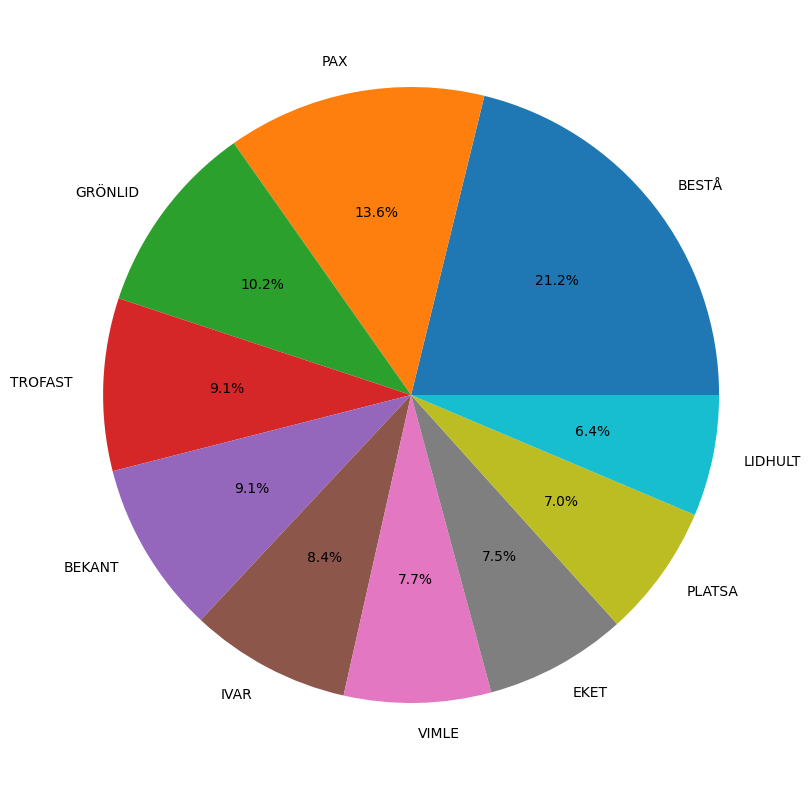

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
y=top10_names
mylabels=['BESTÅ', 'PAX', 'GRÖNLID', 'TROFAST','BEKANT', 'IVAR', 'VIMLE', 'EKET', 'PLATSA', 'LIDHULT']
ax.pie(y, labels=mylabels, autopct='%1.1f%%')
plt.show()

In [ ]:
df['category'].value_counts()

category
Bookcases & shelving units              548
Chairs                                  438
Sofas & armchairs                       380
Tables & desks                          370
Wardrobes                               220
Beds                                    208
Outdoor furniture                       197
Cabinets & cupboards                    187
Chests of drawers & drawer units        111
TV & media furniture                     89
Children's furniture                     84
Bar furniture                            47
Trolleys                                 23
Nursery furniture                        22
Café furniture                           18
Sideboards, buffets & console tables     10
Room dividers                            10
Name: count, dtype: int64

In [ ]:
df_10=df['category'].value_counts()[0:10]
print(df_10)

category
Bookcases & shelving units          548
Chairs                              438
Sofas & armchairs                   380
Tables & desks                      370
Wardrobes                           220
Beds                                208
Outdoor furniture                   197
Cabinets & cupboards                187
Chests of drawers & drawer units    111
TV & media furniture                 89
Name: count, dtype: int64


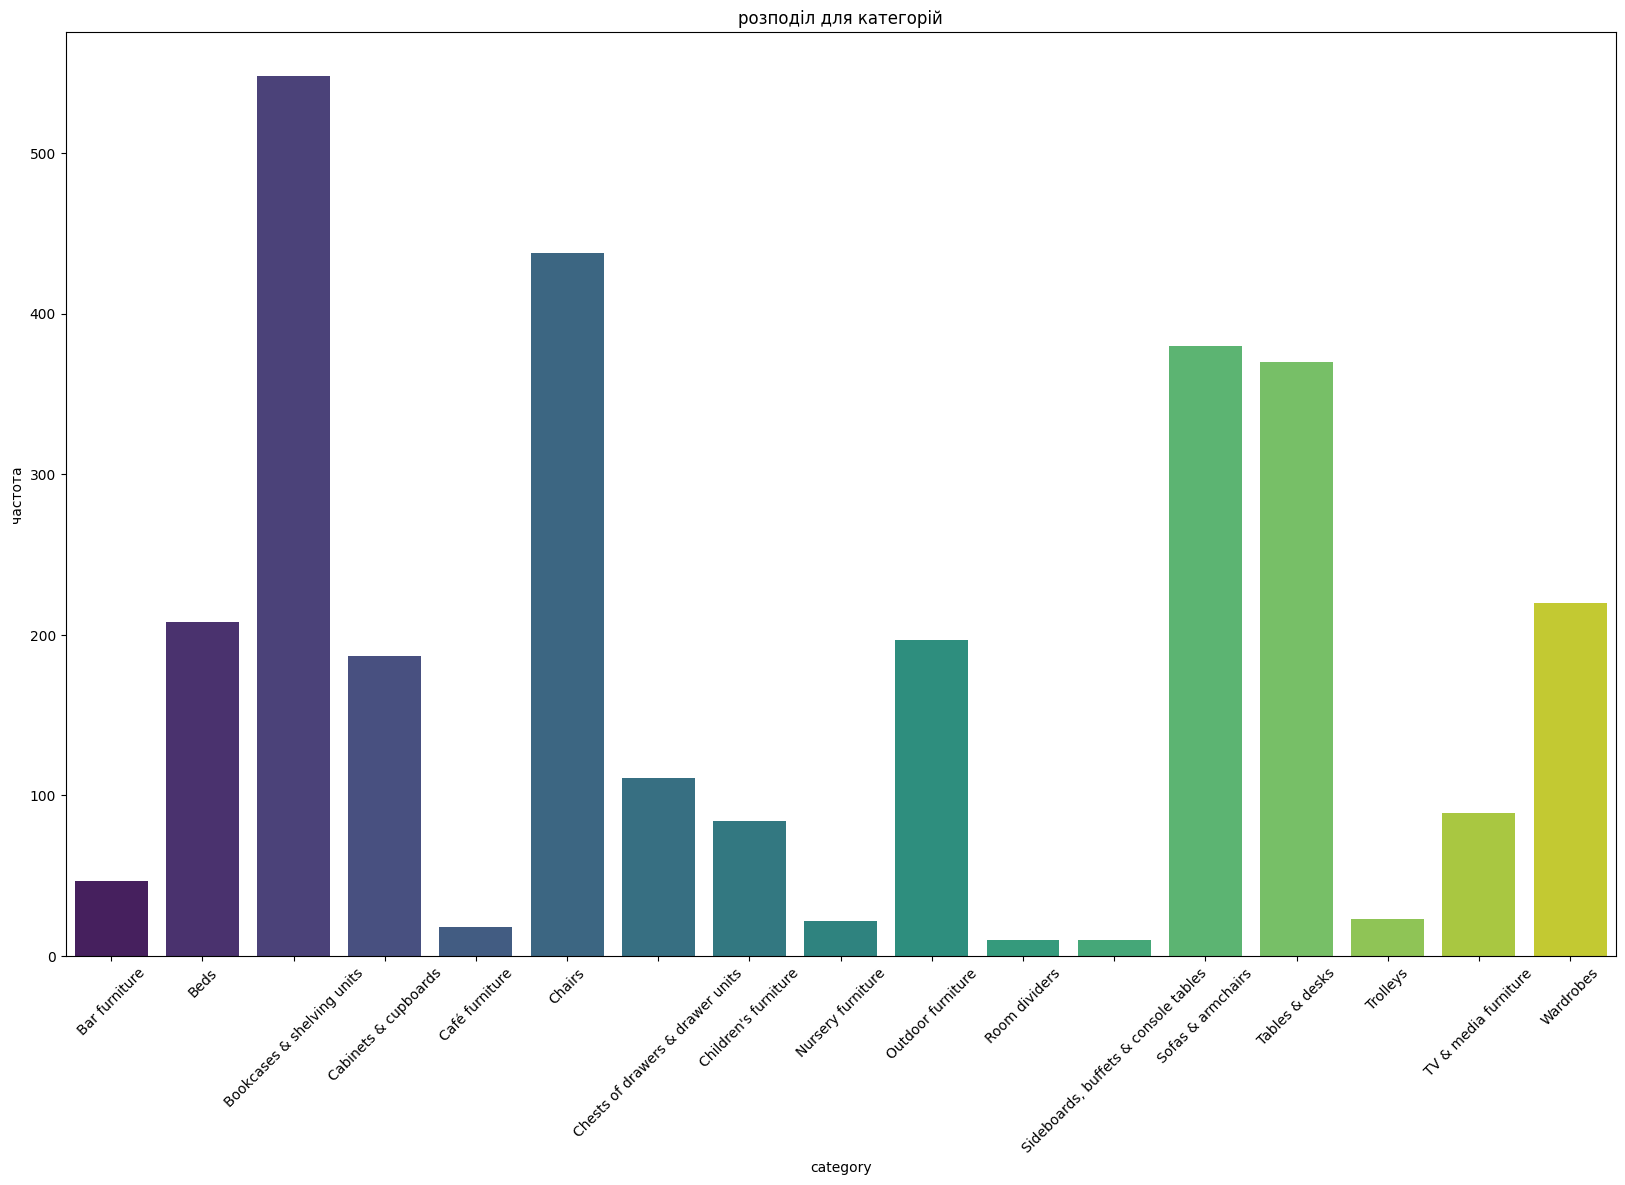

In [ ]:
plt.figure(figsize=(20,12))
sns.countplot(x=df.category, data=df, palette = 'viridis')
plt.title('розподіл для категорій')
plt.xlabel('category')
plt.ylabel('частота')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.groupby('category')['price'].max()

category
Bar furniture                           2375.0
Beds                                    9585.0
Bookcases & shelving units              4335.0
Cabinets & cupboards                    6480.0
Café furniture                          1140.0
Chairs                                  6965.0
Chests of drawers & drawer units        1880.0
Children's furniture                    1545.0
Nursery furniture                       1225.0
Outdoor furniture                       5144.0
Room dividers                           2397.0
Sideboards, buffets & console tables    1950.0
Sofas & armchairs                       9585.0
TV & media furniture                    4175.0
Tables & desks                          6614.0
Trolleys                                2295.0
Wardrobes                               8380.0
Name: price, dtype: float64

In [ ]:
df_category_mean = df.groupby('category')['price'].mean()
print(df_category_mean)

category
Bar furniture                            679.553191
Beds                                    1647.432692
Bookcases & shelving units               519.416058
Cabinets & cupboards                     789.015753
Café furniture                           553.884615
Chairs                                  1048.932640
Chests of drawers & drawer units         612.180000
Children's furniture                     272.758065
Nursery furniture                        393.659794
Outdoor furniture                        859.826852
Room dividers                            932.000000
Sideboards, buffets & console tables    1068.086957
Sofas & armchairs                       2004.016355
TV & media furniture                     659.050526
Tables & desks                          1129.395425
Trolleys                                 678.517857
Wardrobes                               2162.141949
Name: price, dtype: float64


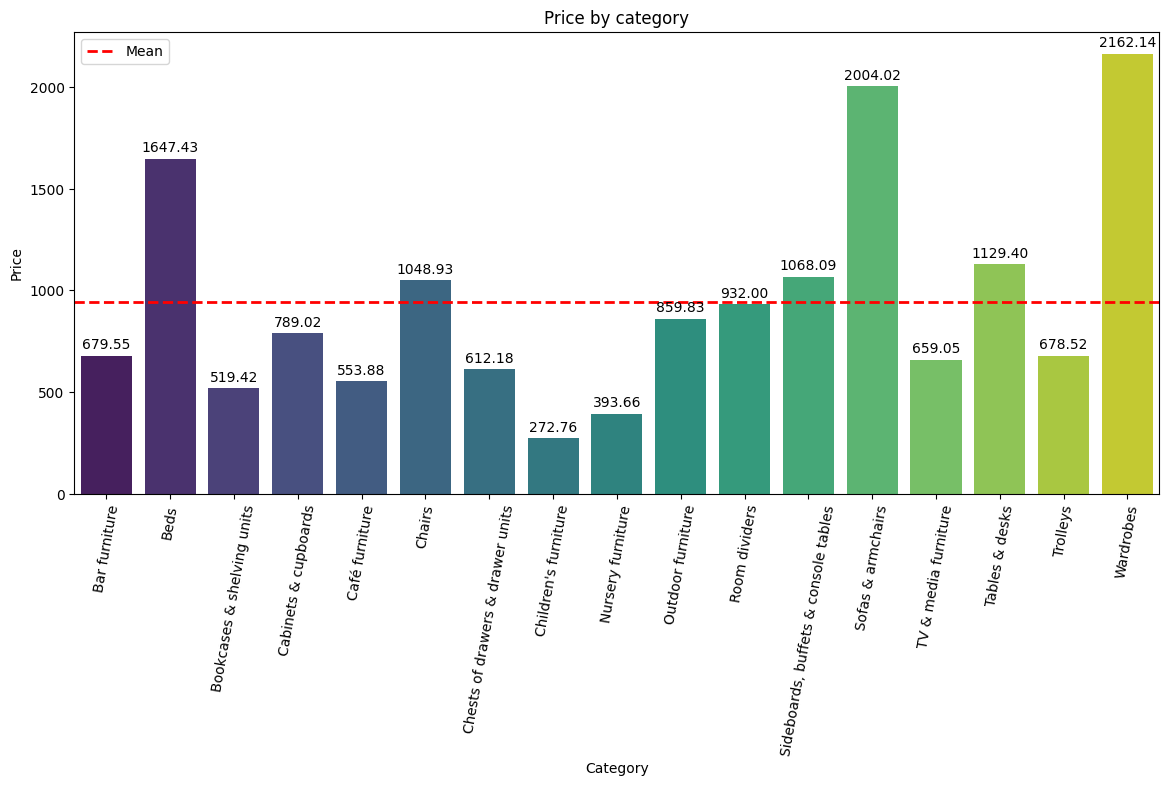

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mean_value = df_category_mean.mean()

plt.figure(figsize=(14, 6))
ax = sns.barplot(x=df_category_mean.index, y=df_category_mean.values, palette='viridis')

plt.axhline(y=mean_value, color='red', linestyle='--', linewidth=2, label='Mean')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Price by category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.xticks(rotation=80)
plt.show()


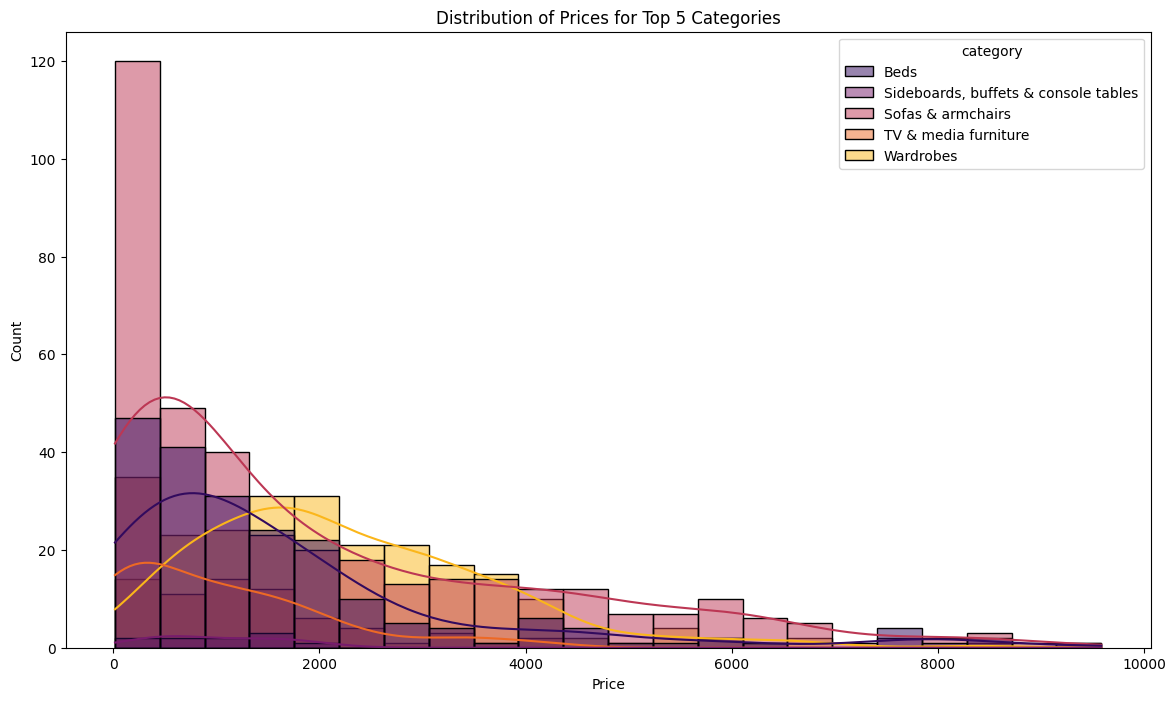

In [ ]:
df_price_category_top5 = df.groupby('category')['price'].median().sort_values().tail(5).index
df_top5 = df[df['category'].isin(df_price_category_top5)]

plt.figure(figsize=(14, 8))

sns.histplot(x='price', hue='category', data=df_top5, palette='inferno', fill=True, kde=True, common_norm=False)

plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Prices for Top 5 Categories')
plt.show()

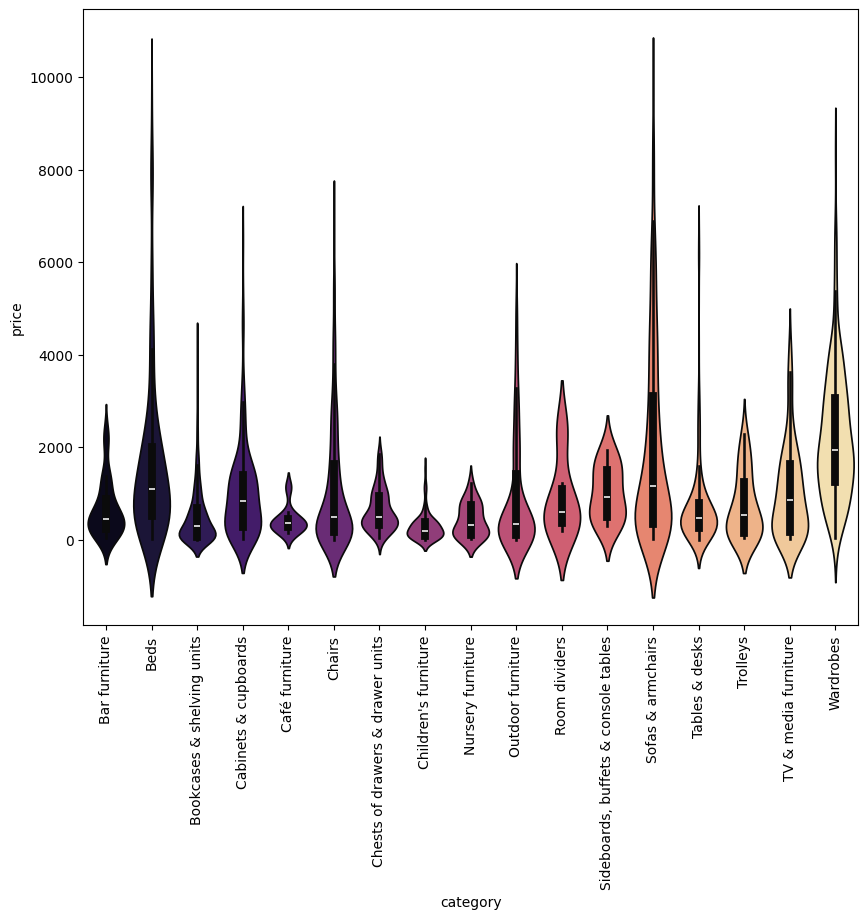

In [ ]:
plt.subplots(figsize = (10,8))
sns.violinplot(data=df, x='category', y='price', palette = 'magma')
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='price', ylabel='category'>

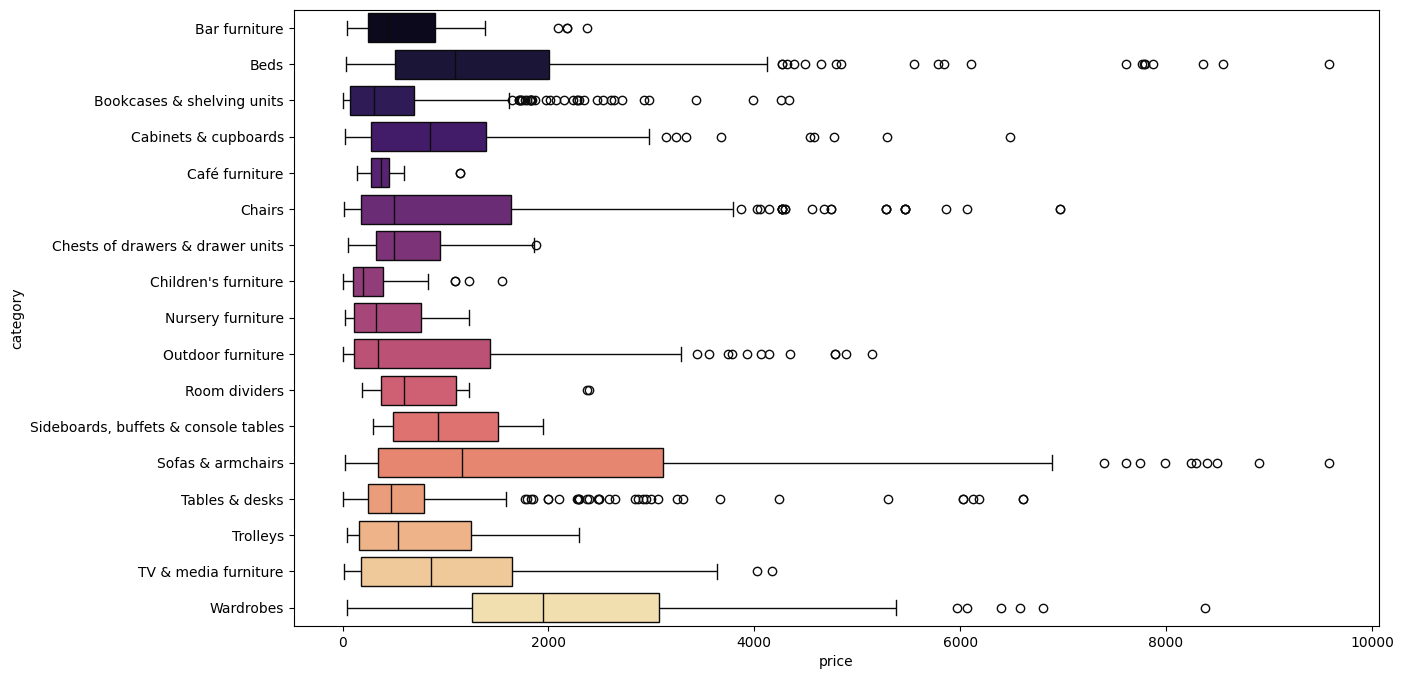

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(df, x='price', y='category', palette = 'magma' )

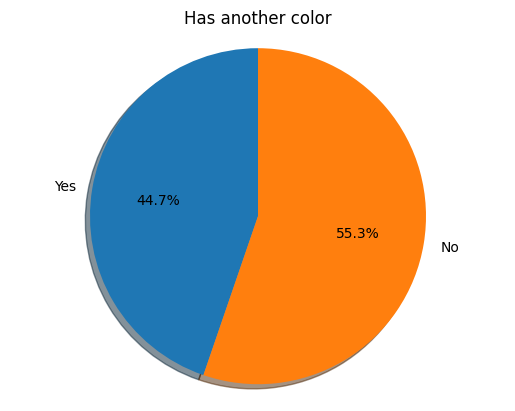

In [ ]:
labels = 'Yes', 'No'
sizes = [(df['other_colors']=='Yes').sum(), (df['other_colors']=='No').sum()]
explode = [0, 0]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Has another color')
plt.show()

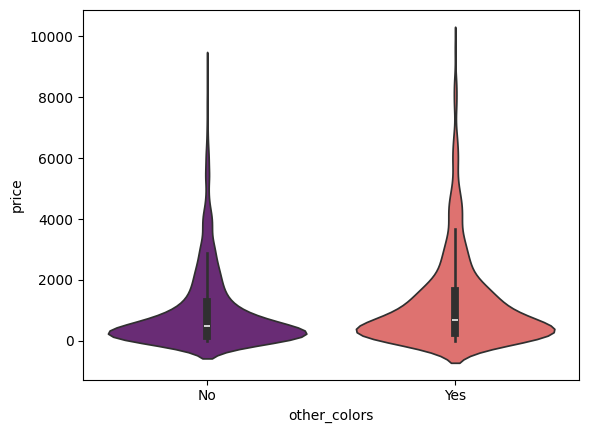

In [ ]:
sns.violinplot(data = df, y = 'price', x = 'other_colors',palette='magma')
plt.show()

In [ ]:
df[df['category'] == 'Sofas & armchairs'].describe()

,price,depth,height,width
count,380.000000,195.000000,242.000000,230.000000
mean,1968.160526,108.138462,77.082645,188.321739
std,2078.736871,42.493496,25.653803,94.164174
min,27.000000,6.000000,4.000000,15.000000
25%,345.000000,89.000000,69.000000,93.000000
50%,1157.000000,98.000000,83.000000,198.500000
75%,3111.000000,113.000000,95.000000,252.000000
max,9585.000000,257.000000,104.000000,387.000000


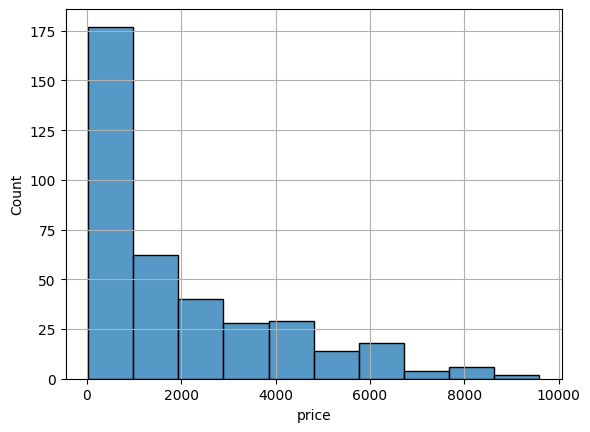

In [ ]:
df_bar = df[df.category == 'Sofas & armchairs']
sns.histplot(df_bar.price, bins= 10)
plt.grid();

In [ ]:
df1 = df.copy()

df1.dropna(inplace= True)

In [ ]:
df_X = df1[['height', 'width', 'depth', 'price']]

Best features: [0 1 3]
[[ 100.   60.   69.]
 [  43.   74.  225.]
 [  91.   40.  345.]
 ...
 [ 236.  100. 2100.]
 [ 236.  150. 3985.]
 [ 236.  200. 2045.]]


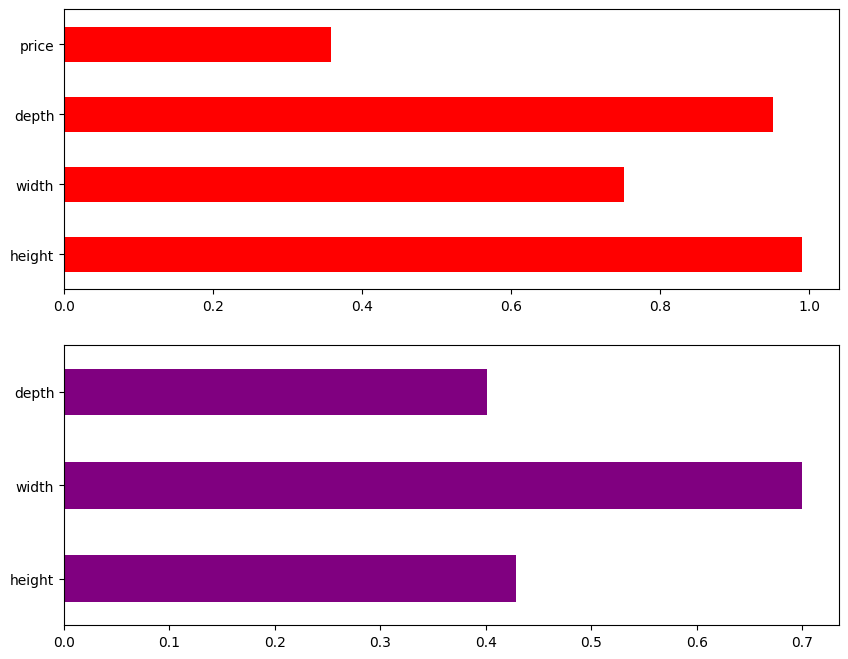

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif, mutual_info_regression
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))

w_df_X = df1[['height', 'width', 'depth', 'price']]
w_df_y = df1['category']

# descrete 'category'
importance_0 = mutual_info_classif(w_df_X, w_df_y)
feature_importances_0 = pd.Series(importance_0, w_df_X.columns)
feature_importances_0.plot(kind='barh', color='red', ax = ax1)

w_df_X_1 = df1[['height', 'width', 'depth']]
w_df_y_1 = df1['price']

# long 'price'
importance_1 = mutual_info_regression(w_df_X_1, w_df_y_1)
feature_importances_1 = pd.Series(importance_1, w_df_X_1.columns)
feature_importances_1.plot(kind='barh', color='purple', ax = ax2)

chi2_features = SelectKBest(chi2, k=3)
X_kbest_features = chi2_features.fit(w_df_X, w_df_y)
print('Best features:', X_kbest_features.get_support(indices=True))

transformed_X = chi2_features.transform(w_df_X)
print(transformed_X)

plt.show()

In [ ]:
df.old_price.unique()

array(['No old price', 'SR 2,375', 'SR 295', 'SR 175', 'SR 995',
       'SR 1,385', 'SR 445', 'SR 925', 'SR 2,205', 'SR 895', 'SR 2,435',
       'SR 125', 'SR 1,595', 'SR 2,880', 'SR 940', 'SR 800', 'SR 1,995',
       'SR 3,245', 'SR 8,735', 'SR 2,310', 'SR 2,560', 'SR 3,760',
       'SR 3,130', 'SR 9,745', 'SR 1,885', 'SR 3,265', 'SR 50/4 pack',
       'SR 1,450', 'SR 250', 'SR 1,590', 'SR 2,360', 'SR 4,040',
       'SR 1,715', 'SR 2,100', 'SR 2,395', 'SR 1,250', 'SR 5,610',
       'SR 7,225', 'SR 2,795', 'SR 8,540', 'SR 1,950', 'SR 5,400',
       'SR 375', 'SR 5,045', 'SR 5,640', 'SR 3,665', 'SR 2,095',
       'SR 2,495', 'SR 9,430', 'SR 6,530', 'SR 138', 'SR 350', 'SR 1,023',
       'SR 437', 'SR 1,390', 'SR 50', 'SR 595', 'SR 275', 'SR 395',
       'SR 26', 'SR 695', 'SR 645', 'SR 649', 'SR 232', 'SR 750', 'SR 30',
       'SR 892', 'SR 10', 'SR 490', 'SR 4,185', 'SR 655', 'SR 27',
       'SR 455', 'SR 7', 'SR 657', 'SR 1,120', 'SR 237', 'SR 22',
       'SR 1,180', 'SR 15', 'SR 10/4

price


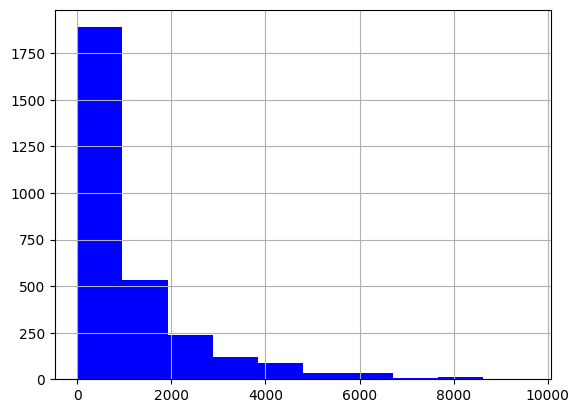

depth


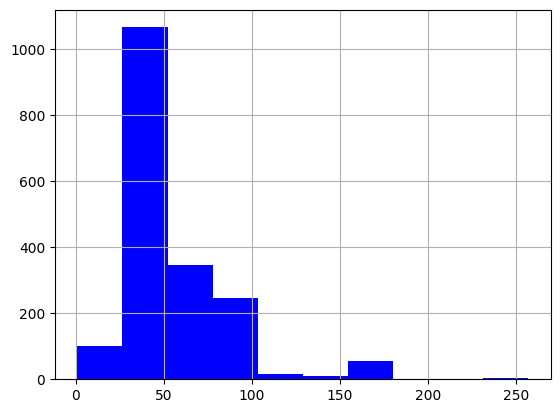

height


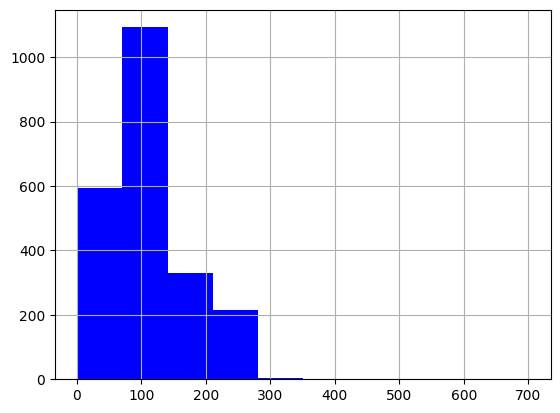

width


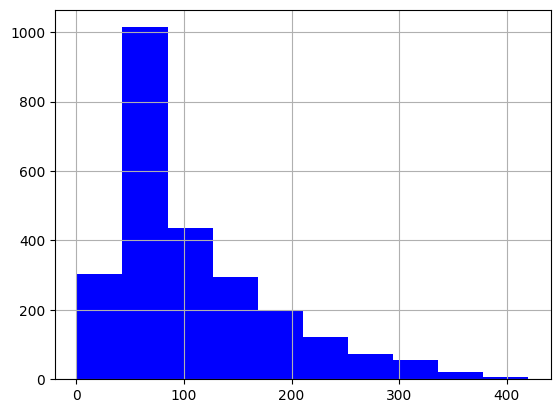

In [ ]:
for col in ['price', 'depth', 'height', 'width']:
    print(col)
    plt.hist(df[col], color = 'blue', bins = 10)
    plt.grid()
    plt.show()

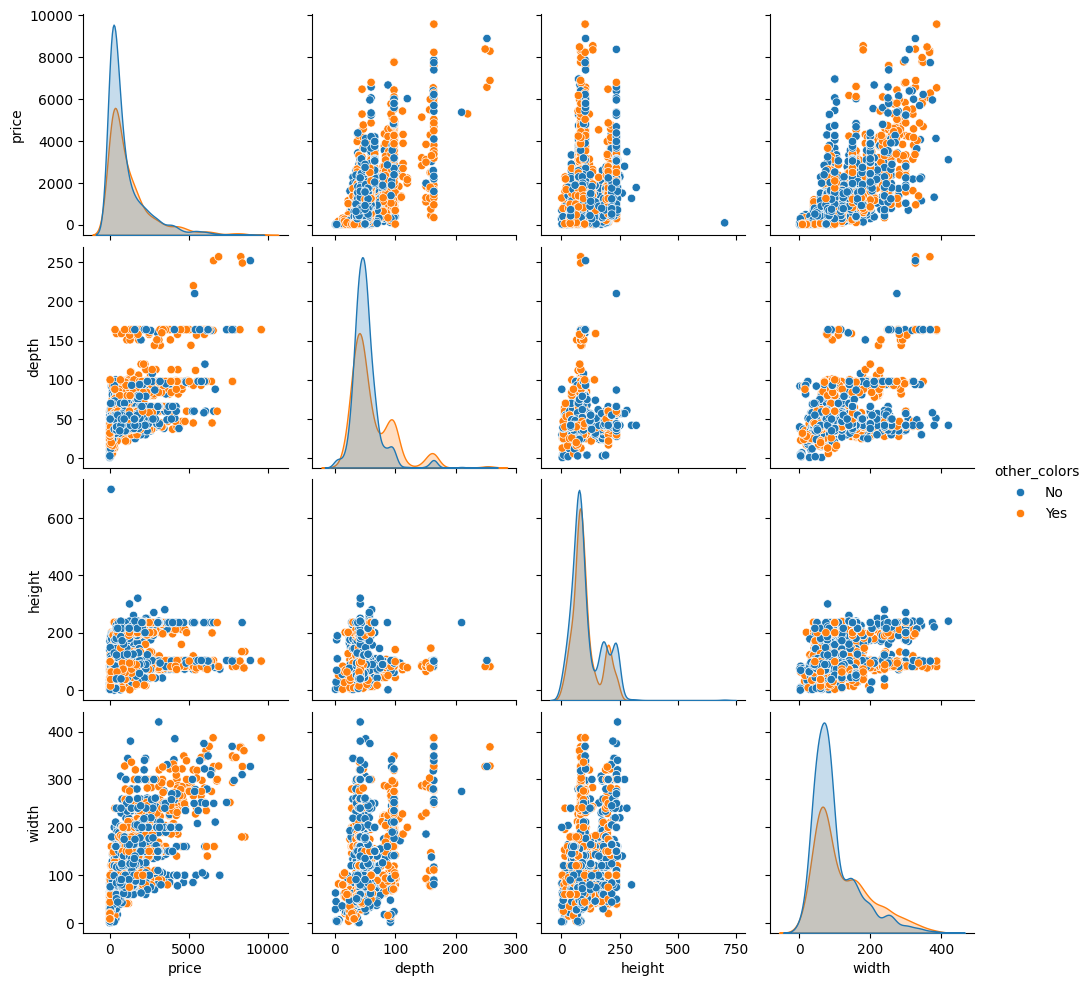

In [ ]:
sns.pairplot(df[['price', 'depth', 'height', 'width', 'other_colors', 'category']], hue = 'other_colors');

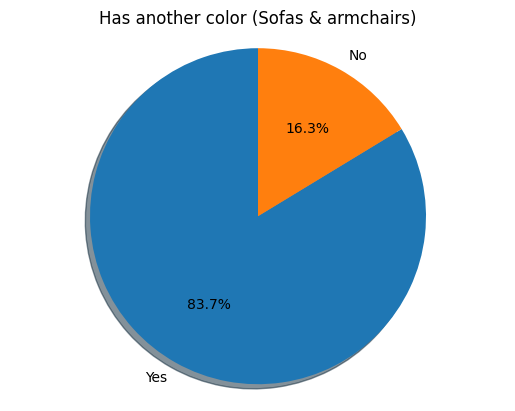

In [ ]:
labels = 'Yes', 'No'
sizes = [(df_bar['other_colors']=='Yes').sum(), (df_bar['other_colors']=='No').sum()]
explode = [0, 0]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Has another color (Sofas & armchairs)')
plt.show()

Text(0.5, 1.0, 'Other colors in price')

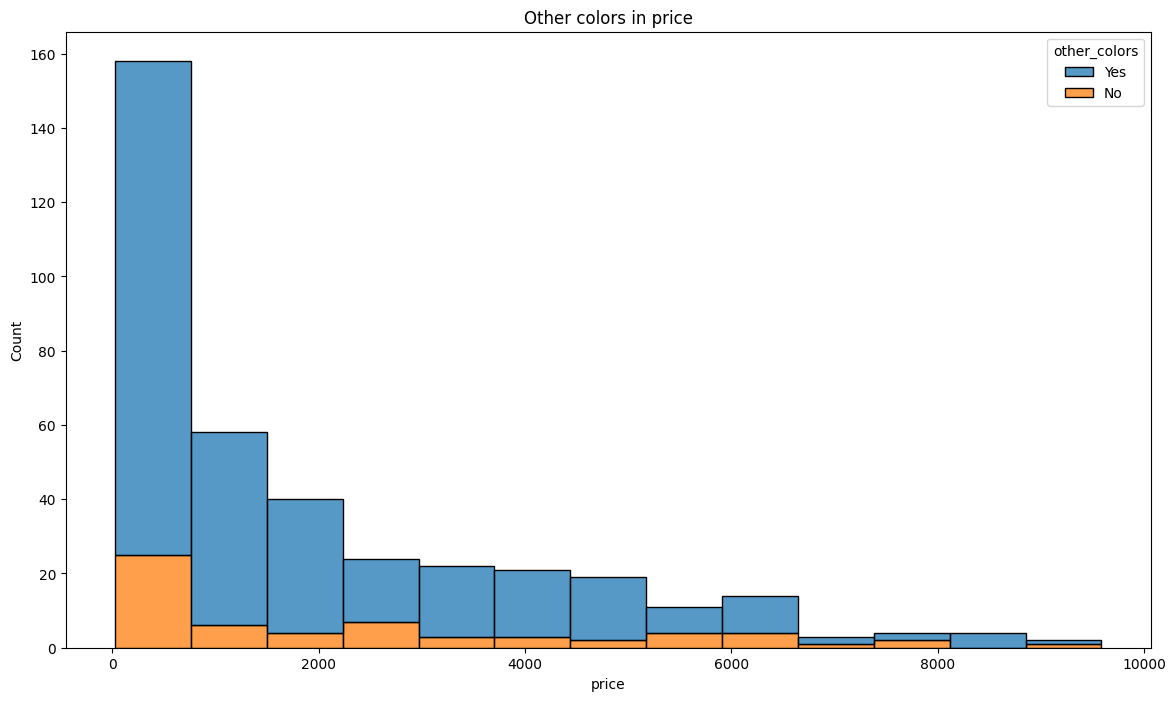

In [ ]:
plt.figure(figsize=(14, 8))
sns.histplot(data=df_bar, x="price", hue="other_colors", multiple="stack")
plt.title("Other colors in price")

In [ ]:
df_colors = df.groupby('category')['other_colors'].value_counts().unstack()
print(df_colors)

other_colors                           No  Yes
category                                      
Bar furniture                          42    5
Beds                                  115   93
Bookcases & shelving units            319  229
Cabinets & cupboards                   47  140
Café furniture                         13    5
Chairs                                343   95
Chests of drawers & drawer units       56   55
Children's furniture                   56   28
Nursery furniture                      15    7
Outdoor furniture                     121   76
Room dividers                           5    5
Sideboards, buffets & console tables    2    8
Sofas & armchairs                      62  318
TV & media furniture                   24   65
Tables & desks                        214  156
Trolleys                               22    1
Wardrobes                             181   39


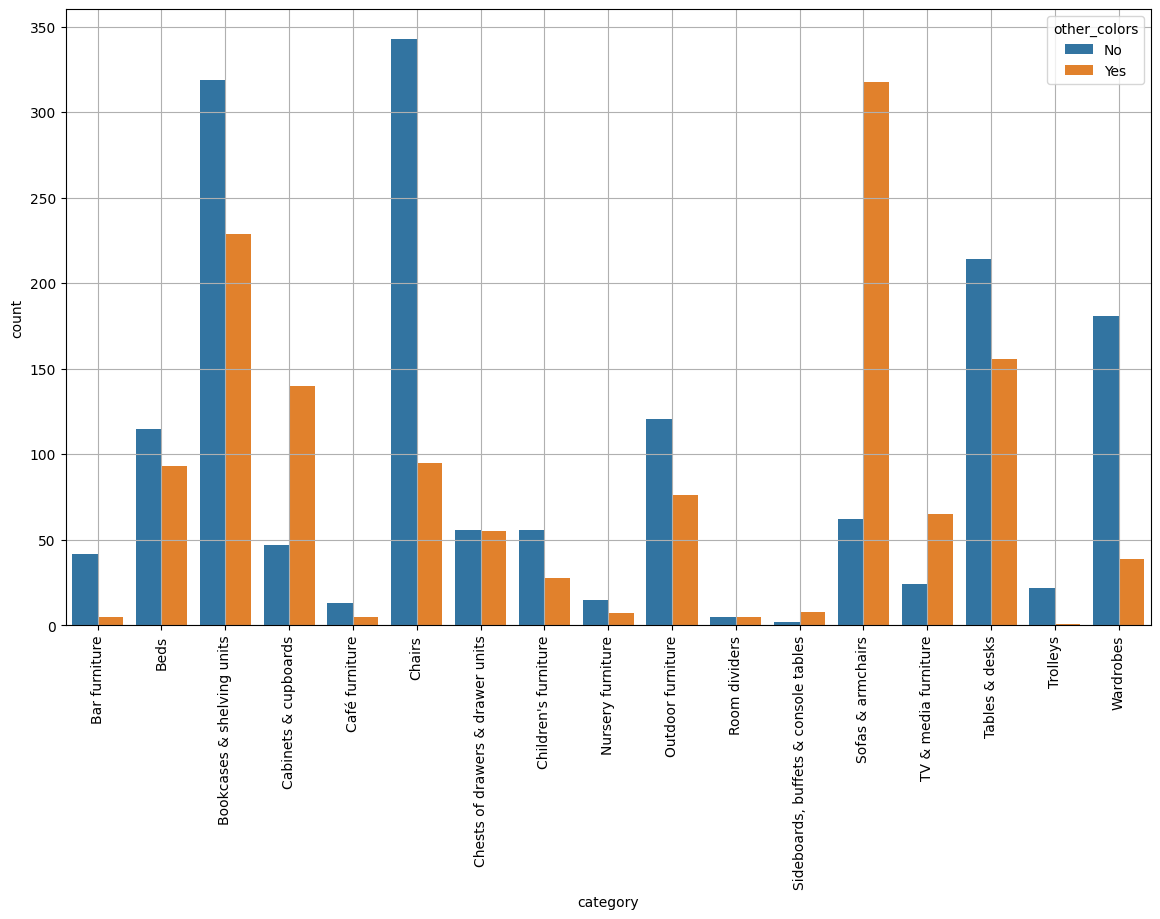

In [ ]:
df_colors_melted = df_colors.reset_index().melt(id_vars='category', var_name='other_colors', value_name='count')

plt.figure(figsize = (14,8))
sns.barplot(data=df_colors_melted, x='category', y='count', hue='other_colors')
plt.xticks(rotation=90)
plt.grid()
plt.show()

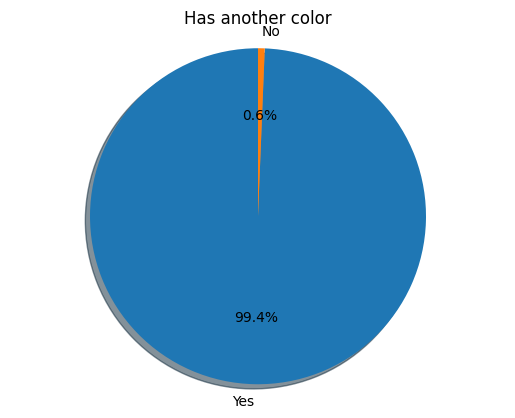

In [ ]:
labels = 'Yes', 'No'
sizes = [(df['sellable_online']== True).sum(), (df['sellable_online']==False).sum()]
explode = [0, 0]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Has another color')
plt.show()

In [ ]:
df['sellable_online'].value_counts()

sellable_online
True     2943
False      19
Name: count, dtype: int64

In [ ]:
df1.head()

,name,category,price,old_price,sellable_online,other_colors,short_description,designer,depth,height,width
3,STIG,Bar furniture,69.0,No old price,True,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,NORBERG,Bar furniture,225.0,No old price,True,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
5,INGOLF,Bar furniture,345.0,No old price,True,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.0,91.0,40.0
6,FRANKLIN,Bar furniture,129.0,No old price,True,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
8,FRANKLIN,Bar furniture,129.0,No old price,True,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0


In [ ]:
df1_category_mean = df1.groupby('category')['price'].mean()
print(df1_category_mean)

category
Bar furniture                            338.416667
Beds                                    2580.769231
Bookcases & shelving units               685.849600
Cabinets & cupboards                    1164.746951
Café furniture                           273.900000
Chairs                                   581.791160
Chests of drawers & drawer units         673.587963
Children's furniture                     345.320755
Nursery furniture                        488.266667
Outdoor furniture                       1206.065753
Room dividers                            638.333333
Sideboards, buffets & console tables    1242.142857
Sofas & armchairs                       3062.744681
TV & media furniture                    1117.705882
Tables & desks                           461.050000
Trolleys                                1038.625000
Wardrobes                               2235.529412
Name: price, dtype: float64


In [ ]:
df_X = df[['height', 'width', 'depth', 'price']]

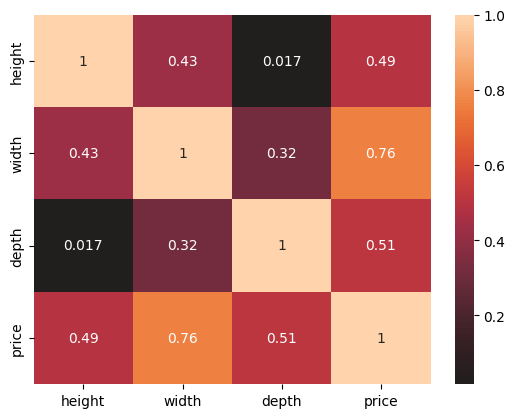

In [ ]:
sns.heatmap(df_X.corr(method= 'spearman'), xticklabels= df_X.corr().columns,
            yticklabels= df_X.corr().columns, center= 0, annot= True);

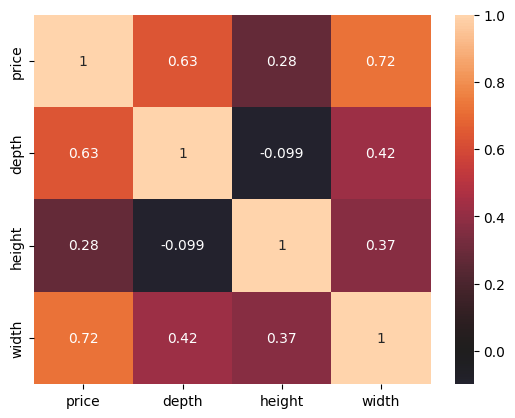

In [ ]:
sns.heatmap(df[['price', 'depth', 'height', 'width']].corr(), xticklabels= df[['price', 'depth', 'height', 'width']].corr().columns,
            yticklabels= df[['price', 'depth', 'height', 'width']].corr().columns, center= 0, annot= True);

In [ ]:
# Create function to clear Designers
def cleanDesigners(value, removeIKEA=False, emptyValue=np.nan):
    if not isinstance(value, str):
        return value

    if len(value)>0 and value[0].isdigit():
        return emptyValue

    designers = value.split("/")

    if removeIKEA:
        try:
            designers.remove("IKEA of Sweden")
        except:
            pass
    if len(designers) > 0:
        return '/'.join(sorted(designers))
    else:
        return emptyValue

In [ ]:
ikea_df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv", index_col= 0).drop_duplicates()

ikea_df['designer_clean'] = df['designer'].apply(cleanDesigners, args= (False, "IKEA of Sweden"))

In [ ]:
ikea_df['designer_clean'].unique()

array(['Nicholai Wiig Hansen', 'Francis Cayouette', 'Henrik Preutz',
       'Marcus Arvonen', 'Carina Bengs', 'K Hagberg/M Hagberg',
       'Sarah Fager', 'Ehlén Johansson', 'Nike Karlsson',
       'Maja Ganszyniec', 'Karl Malmvall',
       'Caroline/John/Jonas/Paul/Petrus', 'Maja Ganszyniec/Nike Karlsson',
       'J Karlsson/N Karlsson', 'IKEA of Sweden/Karl Malmvall',
       'IKEA of Sweden', 'J Karlsson/N Karlsson/Nike Karlsson',
       'Ola Wihlborg', 'IKEA of Sweden/Tina Christensen',
       'IKEA of Sweden/K Hagberg/M Hagberg',
       'IKEA of Sweden/Ola Wihlborg', 'Ebba Strandmark/IKEA of Sweden',
       'Jon Karlsson', 'Carina Bengs/IKEA of Sweden', 'David Wahl',
       'IKEA of Sweden/Jon Karlsson', 'IKEA of Sweden/Paulin Machado',
       'Eva Lilja Löwenhielm/IKEA of Sweden',
       'IKEA of Sweden/Ola Wihlborg/Synnöve Mork',
       'David Wahl/IKEA of Sweden', 'Eva Lilja Löwenhielm',
       'Anna Efverlund/IKEA of Sweden', 'Paulin Machado',
       'Jonas Hultqvist', 'Gustav 

In [ ]:
ikea_df['designer_clean'].value_counts()

designer_clean
IKEA of Sweden                              785
Ehlén Johansson/IKEA of Sweden              138
Ehlén Johansson                             136
Francis Cayouette                           131
Ola Wihlborg                                128
                                           ... 
Chris Martin/IKEA of Sweden/Mia Lagerman      1
Ehlén Johansson/Karl Malmvall                 1
J Löfgren/J Pettersson/Marcus Arvonen         1
Eva Schildt                                   1
Lars Norinder                                 1
Name: count, Length: 199, dtype: int64

In [ ]:
ikea_df.groupby('designer_clean')['price'].max()

designer_clean
A Fredriksson/H Preutz                                 1570.0
A Fredriksson/HAY/J Hultqvist/W Chong                   175.0
A Fredriksson/IKEA of Sweden/J Hultqvist/W Chong        195.0
A Fredriksson/J Hultqvist/Lisa Norinder/W Chong         175.0
A Fredriksson/J Hultqvist/Mikael Warnhammar/W Chong    1210.0
                                                        ...  
Tina Christensen                                       6000.0
Tom Dixon                                              4783.0
Tord Björklund                                         2370.0
Virgil Abloh                                            595.0
Wiebke Braasch                                         3196.0
Name: price, Length: 199, dtype: float64

In [ ]:
ikea_df.groupby('designer_clean')['price'].mean()

designer_clean
A Fredriksson/H Preutz                                  182.366667
A Fredriksson/HAY/J Hultqvist/W Chong                   175.000000
A Fredriksson/IKEA of Sweden/J Hultqvist/W Chong        195.000000
A Fredriksson/J Hultqvist/Lisa Norinder/W Chong         175.000000
A Fredriksson/J Hultqvist/Mikael Warnhammar/W Chong    1210.000000
                                                          ...     
Tina Christensen                                       2042.705882
Tom Dixon                                               739.809524
Tord Björklund                                          576.269231
Virgil Abloh                                            374.400000
Wiebke Braasch                                         1785.500000
Name: price, Length: 199, dtype: float64

In [ ]:
ikea_df.groupby('designer_clean')['category'].value_counts()

designer_clean                                    category                  
A Fredriksson/H Preutz                            Bookcases & shelving units    20
                                                  Tables & desks                 7
                                                  Cabinets & cupboards           3
A Fredriksson/HAY/J Hultqvist/W Chong             Chairs                         1
A Fredriksson/IKEA of Sweden/J Hultqvist/W Chong  Cabinets & cupboards           1
                                                                                ..
Virgil Abloh                                      Cabinets & cupboards           1
                                                  Sofas & armchairs              1
                                                  Café furniture                 1
Wiebke Braasch                                    Sofas & armchairs              1
                                                  Tables & desks                 1
Name: coun

In [ ]:
designer_df_top10=ikea_df['designer_clean'].value_counts()[0:10]
print(designer_df_top10)

designer_clean
IKEA of Sweden                    971
Ehlén Johansson                   161
Francis Cayouette                 151
Ehlén Johansson/IKEA of Sweden    145
Ola Wihlborg                      134
K Hagberg/M Hagberg               122
Jon Karlsson                      120
Carina Bengs                       75
Henrik Preutz                      70
Studio Copenhagen                  64
Name: count, dtype: int64


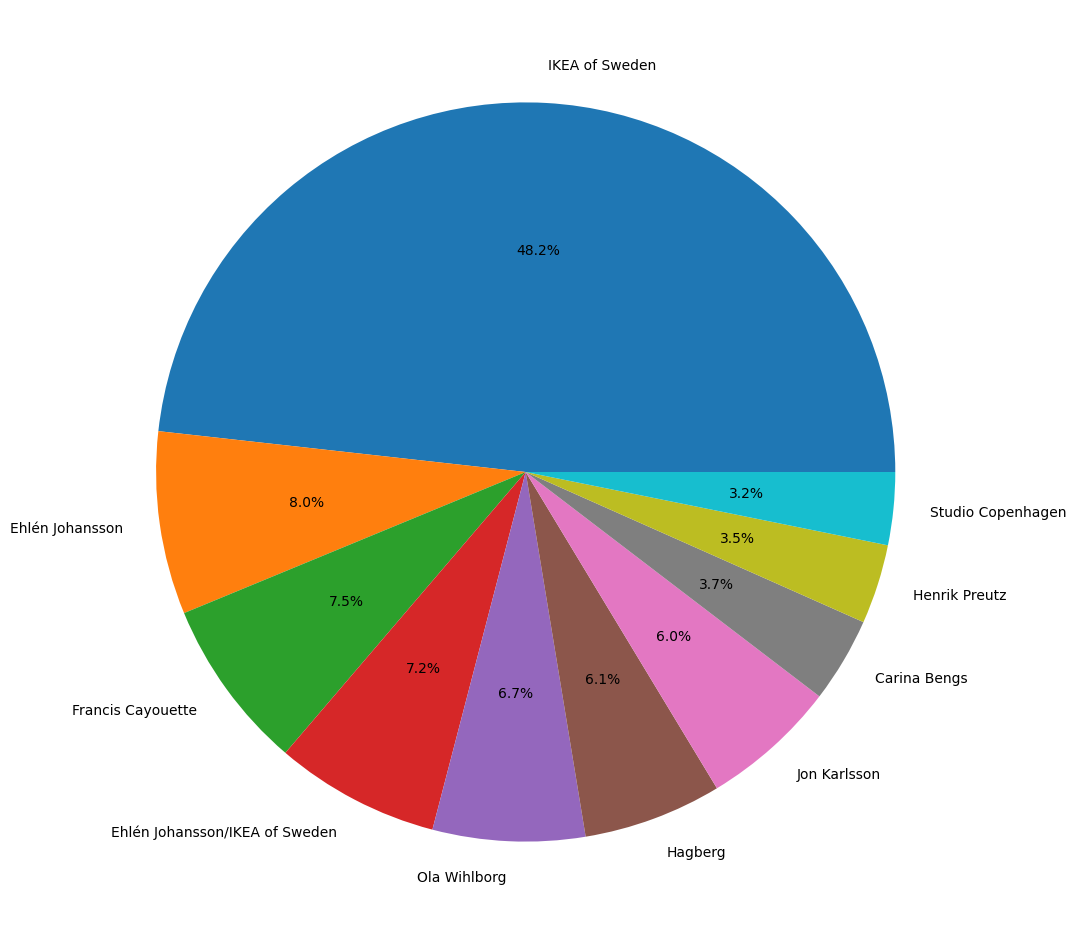

In [ ]:
fig,ax=plt.subplots(figsize=(12,12))
y=designer_df_top10
mylabels=['IKEA of Sweden', 'Ehlén Johansson', 'Francis Cayouette', 'Ehlén Johansson/IKEA of Sweden','Ola Wihlborg', 'Hagberg', 'Jon Karlsson', 'Carina Bengs', 'Henrik Preutz', 'Studio Copenhagen']
ax.pie(y, labels=mylabels, autopct='%1.1f%%')
plt.show()

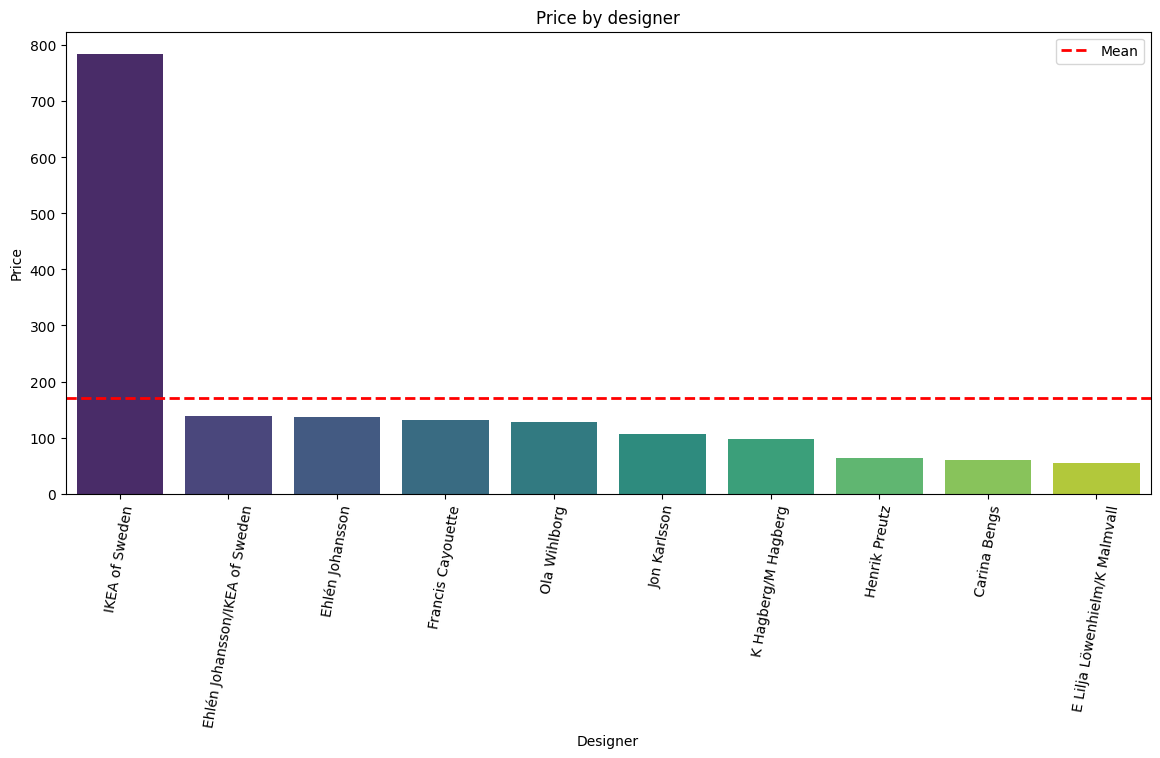

In [ ]:
mean_value = designer_df_top10.mean()
plt.figure(figsize=(14, 6))

sns.barplot(x=designer_df_top10.index, y=designer_df_top10.values, palette='viridis')
plt.axhline(y=mean_value, color='red', linestyle='--', linewidth=2, label='Mean')

plt.title('Price by designer')
plt.xlabel('Designer')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.xticks(rotation=80)
plt.show()

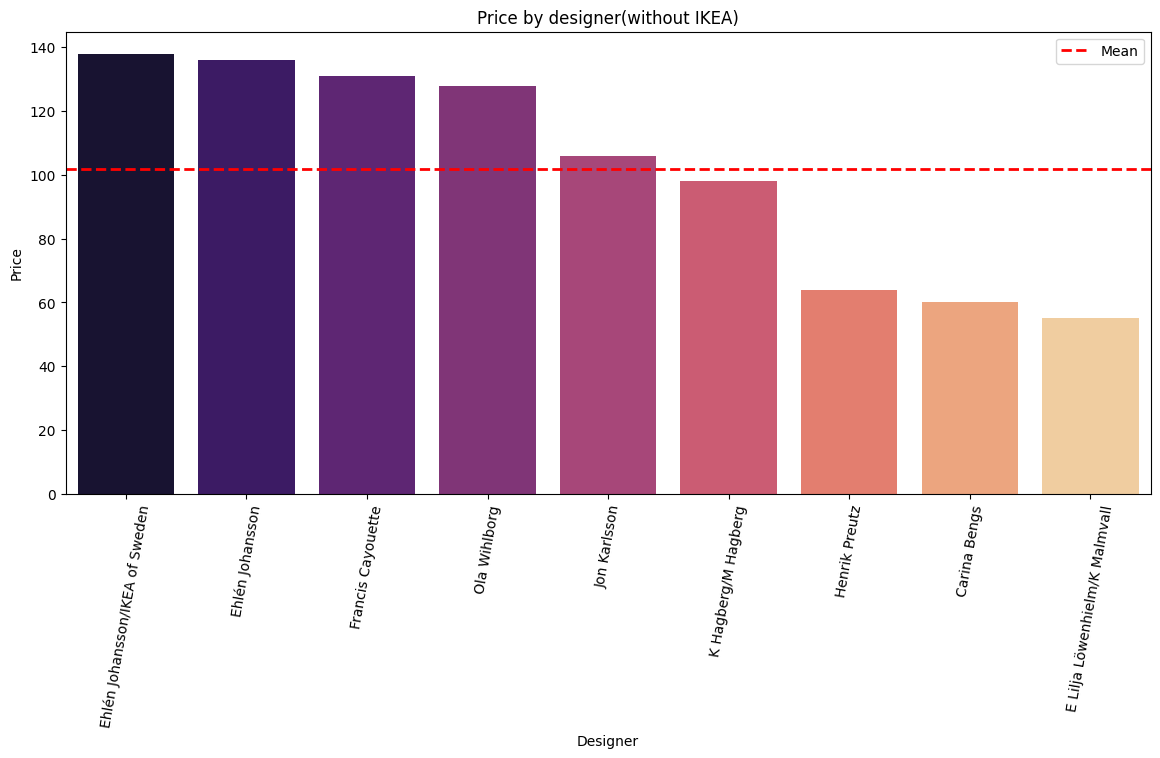

In [ ]:
mean_value = designer_df_top10[1:10].mean()
plt.figure(figsize=(14, 6))

sns.barplot(x=designer_df_top10[1:10].index, y=designer_df_top10[1:10].values, palette='magma')
plt.axhline(y=mean_value, color='red', linestyle='--', linewidth=2, label='Mean')

plt.title('Price by designer(without IKEA)')
plt.xlabel('Designer')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.xticks(rotation=80)
plt.show()

<Axes: xlabel='price', ylabel='designer_clean'>

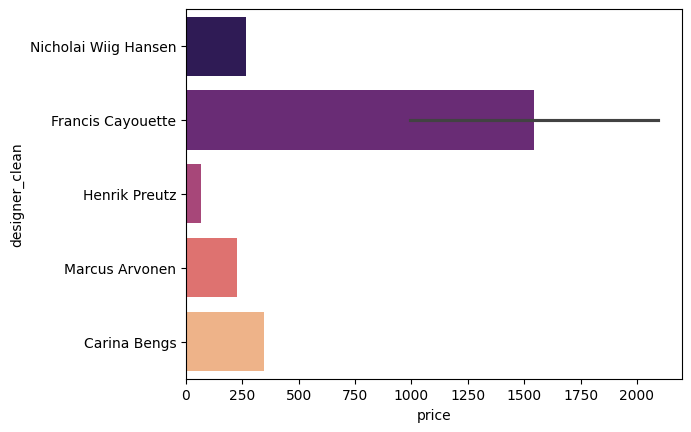

In [ ]:
ikea_df1=ikea_df[0:6]
sns.barplot(x='price', y='designer_clean', data=ikea_df1, palette = 'magma')

In [ ]:
df_francis = df[df['designer'] == 'Francis Cayouette']

category_counts = df_francis['category'].value_counts()
print(category_counts)

category
Sofas & armchairs             53
Bookcases & shelving units    46
Chairs                        16
Tables & desks                 7
Cabinets & cupboards           4
Bar furniture                  3
TV & media furniture           2
Name: count, dtype: int64


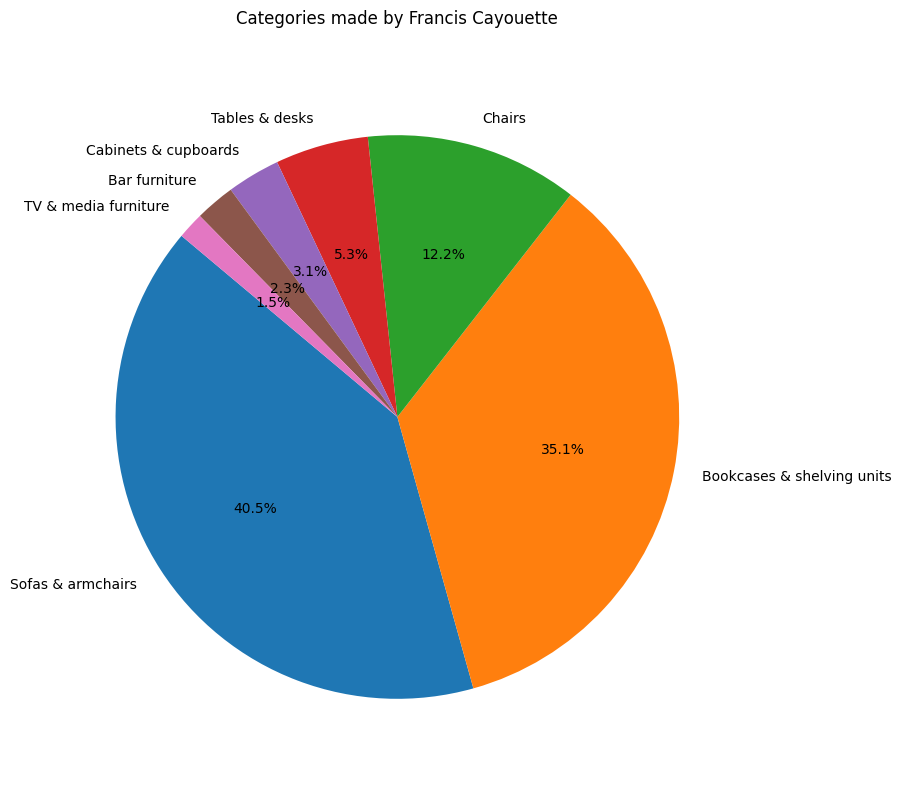

In [ ]:
plt.figure(figsize=(8, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Categories made by Francis Cayouette')
plt.axis('equal')
plt.show()

In [ ]:
df_sweden = df[df['designer'] == 'IKEA of Sweden']

category_counts1 = df_sweden['category'].value_counts()

threshold = 30
category_counts1_filtered = category_counts1[category_counts1 >= threshold]
others_count = category_counts1[category_counts1 < threshold].sum()
category_counts1_filtered['Others'] = others_count
print(category_counts1_filtered)

category
Bookcases & shelving units    256
Tables & desks                 73
Chairs                         64
Cabinets & cupboards           56
Outdoor furniture              47
Beds                           45
Sofas & armchairs              37
TV & media furniture           36
Others                         69
Name: count, dtype: int64


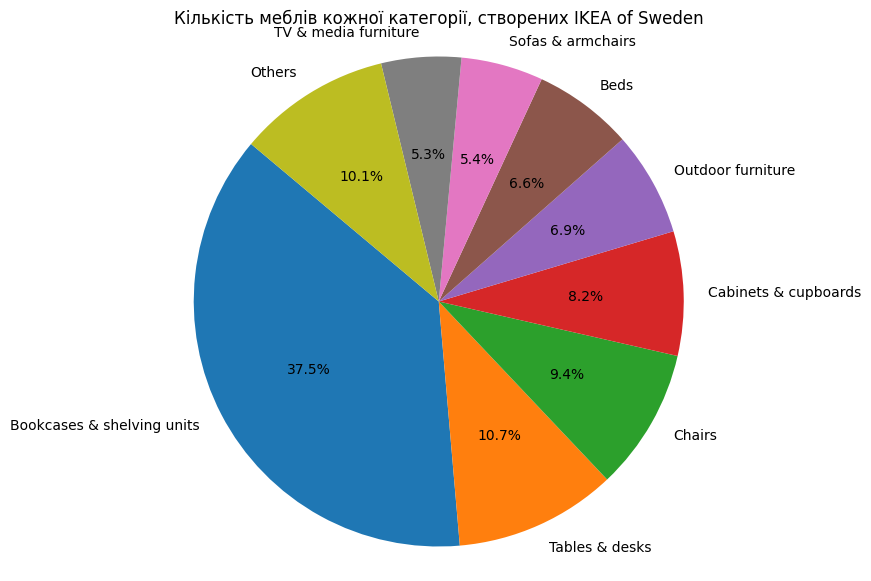

In [ ]:
plt.figure(figsize=(10, 7))
plt.pie(category_counts1_filtered, labels=category_counts1_filtered.index, autopct='%1.1f%%', startangle=140)
plt.title('Кількість меблів кожної категорії, створених IKEA of Sweden')
plt.axis('equal')
plt.show()

In [ ]:
df_ehlen = df[df['designer'] == 'Ehlén Johansson']

category_counts2 = df_ehlen['category'].value_counts()
print(category_counts2)

category
Sofas & armchairs    73
Wardrobes            16
Chairs               15
Tables & desks       13
Bar furniture         9
Beds                  4
Room dividers         4
Trolleys              2
Name: count, dtype: int64


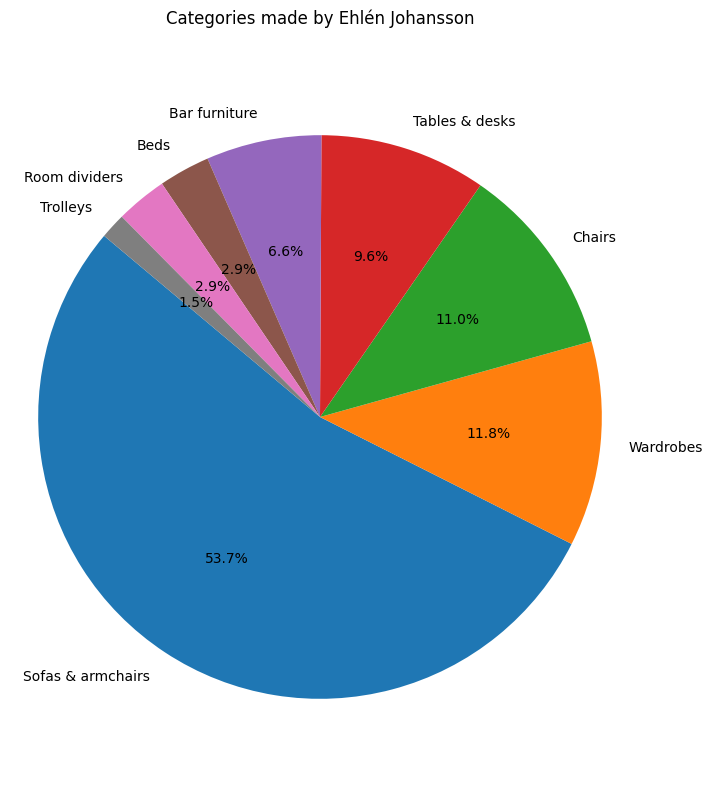

In [ ]:
plt.figure(figsize=(8, 10))
plt.pie(category_counts2, labels=category_counts2.index, autopct='%1.1f%%', startangle=140)
plt.title('Categories made by Ehlén Johansson')
plt.axis('equal')
plt.show()

In [ ]:
df_bookcases = ikea_df[ikea_df['category'] == 'Bookcases & shelving units']

des_counts = df_bookcases['designer'].value_counts()[0:5]
print(des_counts)

designer
IKEA of Sweden                 256
Francis Cayouette               46
Jon Karlsson                    34
H Preutz/A Fredriksson          20
IKEA of Sweden/Jon Karlsson     17
Name: count, dtype: int64


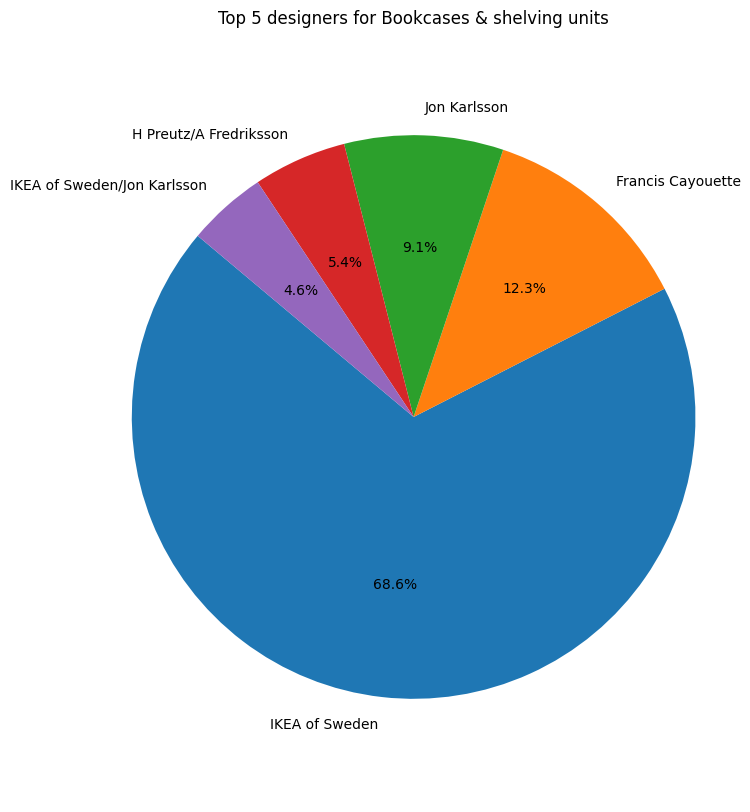

In [ ]:
plt.figure(figsize=(8, 10))
plt.pie(des_counts, labels=des_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 designers for Bookcases & shelving units')
plt.axis('equal')
plt.show()

In [ ]:
df_wardrobes = ikea_df[ikea_df['category'] == 'Wardrobes']

des_counts1 = df_bookcases['designer'].value_counts()[0:5]
print(des_counts1)

designer
IKEA of Sweden                 256
Francis Cayouette               46
Jon Karlsson                    34
H Preutz/A Fredriksson          20
IKEA of Sweden/Jon Karlsson     17
Name: count, dtype: int64


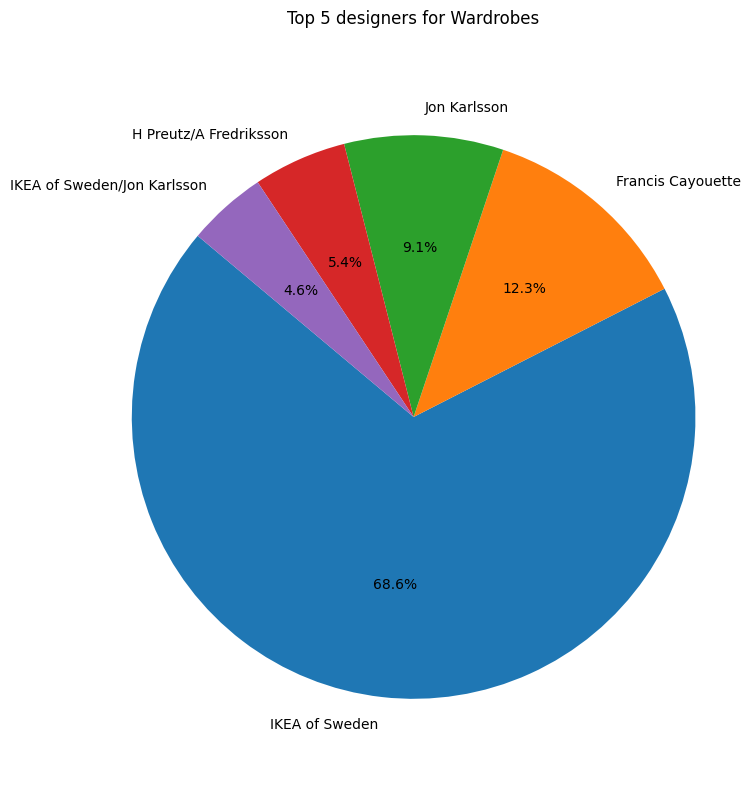

In [ ]:
plt.figure(figsize=(8, 10))
plt.pie(des_counts1, labels=des_counts1.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 designers for Wardrobes')
plt.axis('equal')
plt.show()

In [ ]:
df_wardrobes1 = ikea_df[ikea_df['category'] == 'Wardrobes']

des_counts2 = df_bookcases['designer'].value_counts()[1:6]
print(des_counts2)

designer
Francis Cayouette              46
Jon Karlsson                   34
H Preutz/A Fredriksson         20
IKEA of Sweden/Jon Karlsson    17
Johan Kroon                    16
Name: count, dtype: int64


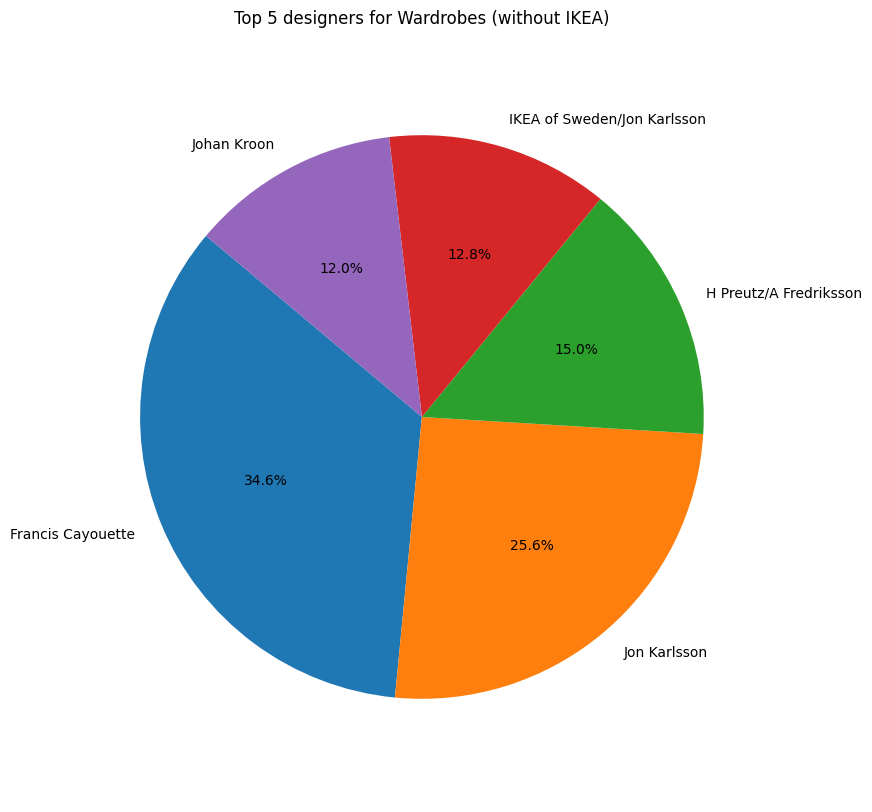

In [ ]:
plt.figure(figsize=(8, 10))
plt.pie(des_counts2, labels=des_counts2.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 designers for Wardrobes (without IKEA)')
plt.axis('equal')
plt.show()

### Моя гіпотеза: ціна товарів залежить від їх розміру.
##### Нульова гіпотеза. - розмір товару не впливає на його ціну
##### Альтернативна гіпотеза. розмір товару впливає на його ціну


In [ ]:
df2 = df.copy()

median_d = df2.groupby('category')['depth'].transform('median')
median_h = df2.groupby('category')['height'].transform('median')
median_w = df2.groupby('category')['width'].transform('median')

df2['depth_1'] = df2['depth'].fillna(median_d)
df2['height_1'] = df2['height'].fillna(median_h)
df2['width_1'] = df2['width'].fillna(median_w)

df2 = df2.reset_index()

df2.head()


,index,name,category,price,old_price,sellable_online,other_colors,short_description,designer,depth,height,width,depth_1,height_1,width_1
0,0,FREKVENS,Bar furniture,265.0,No old price,True,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,47.0,99.0,51.0
1,1,NORDVIKEN,Bar furniture,995.0,No old price,False,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,47.0,105.0,80.0
2,2,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,47.0,102.0,48.0
3,3,STIG,Bar furniture,69.0,No old price,True,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,50.0,100.0,60.0
4,4,NORBERG,Bar furniture,225.0,No old price,True,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,60.0,43.0,74.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2962 entries, 0 to 2961
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              2962 non-null   int64  
 1   name               2962 non-null   object 
 2   category           2962 non-null   object 
 3   price              2962 non-null   float64
 4   old_price          2962 non-null   object 
 5   sellable_online    2962 non-null   bool   
 6   other_colors       2962 non-null   object 
 7   short_description  2962 non-null   object 
 8   designer           2962 non-null   object 
 9   depth              1844 non-null   float64
 10  height             2236 non-null   float64
 11  width              2520 non-null   float64
 12  depth_1            2962 non-null   float64
 13  height_1           2962 non-null   float64
 14  width_1            2962 non-null   float64
dtypes: bool(1), float64(7), int64(1), object(6)
memory usage: 327.0+ KB


In [ ]:
df2['size'] = df2['depth_1'] * df2['height_1'] * df2['width_1']

In [ ]:
df2.head()

,index,name,category,price,old_price,sellable_online,other_colors,short_description,designer,depth,height,width,depth_1,height_1,width_1,size
0,0,FREKVENS,Bar furniture,265.0,No old price,True,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,47.0,99.0,51.0,237303.0
1,1,NORDVIKEN,Bar furniture,995.0,No old price,False,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,47.0,105.0,80.0,394800.0
2,2,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,47.0,102.0,48.0,230112.0
3,3,STIG,Bar furniture,69.0,No old price,True,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,50.0,100.0,60.0,300000.0
4,4,NORBERG,Bar furniture,225.0,No old price,True,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,60.0,43.0,74.0,190920.0


In [ ]:
import statsmodels.api as sm

Y = df2['price']

X = df2['size']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     2613.
Date:                Sun, 26 May 2024   Prob (F-statistic):               0.00
Time:                        19:20:04   Log-Likelihood:                -24709.
No. Observations:                2962   AIC:                         4.942e+04
Df Residuals:                    2960   BIC:                         4.943e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        334.8646     24.032     13.934      0.0

In [ ]:
import scipy.stats as stats

df2['size'] = df2['depth_1'] * df2['height_1'] * df2['width_1']

correlation, p_value = stats.pearsonr(df2['size'], df2['price'])

print(f'Correlation: {correlation}, p-value: {p_value}')


Correlation: 0.6847511716749114, p-value: 0.0


In [ ]:
import statsmodels.api as sm

df2['size'] = df2['depth_1'] * df2['height_1'] * df2['width_1']

Y = df2['price']

X = df2['size']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(f"t-values:\n{model.tvalues}")
print(f"p-values:\n{model.pvalues}")



t-values:
const    13.934373
size     51.119196
dtype: float64
p-values:
const    8.547829e-43
size     0.000000e+00
dtype: float64


###Коефіцієнти моделі:

const: 334.8646
size: 0.0010
Це означає, що базова ціна (при нульовому розмірі) становить приблизно 334.86. На кожну одиницю збільшення розміру ціна збільшується на 0.001.

###R-squared:

Значення R-squared = 0.469 означає, що 46.9% варіації в ціні товарів можна пояснити їх розміром. Це не надзвичайно високий показник, але і не малий. Це вказує на те, що розмір має значний вплив, але є й інші фактори, що також впливають на ціну.

###F-statistic:

F-statistic: 2613, p-value: 0.00
Високе значення F-статистики і p-value 0.00 (яке є значно меншим за 0.05) свідчить про те, що модель значуща і незалежна змінна (size) впливає на залежну змінну (price).

###Т-статистика і p-value для коефіцієнтів:

const: t-value = 13.934373, p-value = 8.547829e-43
size: t-value = 51.119196, p-value = 0.000000e+00
Високі значення t-статистики і дуже малі значення p-value (значно менші за 0.05) для обох коефіцієнтів свідчать про те, що ці коефіцієнти є значущими. Це означає, що і базова ціна, і вплив розміру на ціну статистично значущі.

###Кореляція:

Кореляція: 0.6847511716749114, p-value: 0.0
Висока кореляція між розміром і ціною підтверджує значний вплив розміру на ціну. Значення кореляції 0.684 вказує на сильну позитивну залежність між розміром товару і його ціною.

###Висновок
Проаналізувавши результати тестів, я відкидаю нульову гіпотезу і приймаю альтернативеу, що залежність між розіміром товару і цого ціною існує

### Моя гіпотеза: ціна товарів залежить від їх довжини опису.
##### Нульова гіпотеза. - довжина опису товару не впливає на його ціну
##### Альтернативна гіпотеза. довжина опису товару впливає на його ціну

In [ ]:
df2['description_length'] = df2['short_description'].apply(len)

In [ ]:
df2.head()

,index,name,category,price,old_price,sellable_online,other_colors,short_description,designer,depth,height,width,depth_1,height_1,width_1,size,description_length
0,0,FREKVENS,Bar furniture,265.0,No old price,True,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,47.0,99.0,51.0,237303.0,48
1,1,NORDVIKEN,Bar furniture,995.0,No old price,False,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,47.0,105.0,80.0,394800.0,37
2,2,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,47.0,102.0,48.0,230112.0,34
3,3,STIG,Bar furniture,69.0,No old price,True,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,50.0,100.0,60.0,300000.0,47
4,4,NORBERG,Bar furniture,225.0,No old price,True,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,60.0,43.0,74.0,190920.0,55


In [ ]:
Y = df2['price']

X = df2['description_length']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     14.24
Date:                Sun, 26 May 2024   Prob (F-statistic):           0.000164
Time:                        19:20:45   Log-Likelihood:                -25639.
No. Observations:                2962   AIC:                         5.128e+04
Df Residuals:                    2960   BIC:                         5.129e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                818.7806     80

In [ ]:
df2['description_length'] = df2['short_description'].apply(len)

correlation, p_value = stats.pearsonr(df2['description_length'], df2['price'])

print(f'Correlation: {correlation}, p-value: {p_value}')


Correlation: 0.06918620158056707, p-value: 0.00016434048131306621


In [ ]:
df2['description_length'] = df2['short_description'].apply(len)

Y = df2['price']

X = df2['description_length']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(f"t-values:\n{model.tvalues}")
print(f"p-values:\n{model.pvalues}")


t-values:
const                 10.111045
description_length     3.773178
dtype: float64
p-values:
const                 1.189695e-23
description_length    1.643405e-04
dtype: float64


###R-squared:

Значення R-squared = 0.005 означає, що лише 0.5% варіації в ціні товарів можна пояснити довжиною опису. Це дуже низьке значення, що вказує на слабку залежність.
###F-статистика і p-value:

F-статистика = 14.24 і відповідне p-value = 0.000164 свідчать про те, що модель є статистично значущою. Це означає, що хоча залежність слабка, вона є значущою на статистичному рівні.
###Коефіцієнти і їх значущість:

Константа (const) і коефіцієнт при змінній description_length мають високі t-статистики і дуже малі p-value (значно менші за 0.05). Це свідчить про статистичну значущість цих коефіцієнтів.
Коефіцієнт при description_length дорівнює 7.2966, що означає, що при збільшенні довжини опису на один символ, ціна товару зростає на 7.2966 одиниць.

###Висновок
На мою думку, довжина опису товару мінімально впливає на його ціну. значення R-squared вказує на те, що цей вплив дуже дуже слабкий. Це означає, що існують інші фактори, які значно більше впливають на ціну товару.

# ML

In [ ]:
X = ikea_df[['depth', 'width', 'height', 'category', 'designer_clean', 'other_colors']]
Y = ikea_df['price']
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

numeric_transf = Pipeline(steps=[
    ('scalar', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])

categorical_transf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

col_prepr = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['depth', 'width', 'height']),
    ('categorical', categorical_transf, ['category', 'designer_clean', 'other_colors'])
])

dtr = Pipeline(steps=[
    ('col_prep', col_prepr),
    ('dtr', DecisionTreeRegressor(max_depth=10, random_state=42))
])

dtr.fit(X_train, Y_train)
dtr_predict = dtr.predict(X_test)

print('R^2 : {:.5f}'.format(dtr.score(X_test, Y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr_predict, Y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr_predict, Y_test))))

R^2 : 0.74147
MAE : 396.26201
MSE : 705.91036


In [ ]:
dtr

Pipeline(steps=[('col_prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler()),
                                                                  ('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['depth', 'width', 'height']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['category', 'designer_clean',
                                                   'other_colors'])])),
                ('dtr', DecisionTreeRegressor(max_depth=10, random_state=42))])

In [ ]:
ikea_df['other_colors_1'] = ikea_df['other_colors'].map(dict(Yes=1, No=0))

median_d = ikea_df.groupby(['category'])['depth'].median()
median_h = ikea_df.groupby(['category'])['height'].median()
median_w = ikea_df.groupby(['category'])['width'].median()

median_price = ikea_df.groupby(['category'])['price'].median()
median_dsgn =  ikea_df.groupby(['designer_clean'])['price'].median()

ikea_df = ikea_df.set_index(['category'])
ikea_df['depth_1'] = ikea_df['depth'].fillna(median_d)
ikea_df['height_1'] = ikea_df['height'].fillna(median_h)
ikea_df['width_1'] = ikea_df['width'].fillna(median_w)
ikea_df['category_median_price'] = median_price

ikea_df = ikea_df.reset_index()

ikea_df = ikea_df.set_index(['designer_clean'])
ikea_df['designer_median_price'] = median_dsgn
ikea_df = ikea_df.reset_index()
ikea_df.head()

,designer_clean,category,item_id,name,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,other_colors_1,depth_1,height_1,width_1,category_median_price,designer_median_price
0,Nicholai Wiig Hansen,Bar furniture,90420332,FREKVENS,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,0,47.0,99.0,51.0,445.0,280.0
1,Francis Cayouette,Bar furniture,368814,NORDVIKEN,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,0,47.0,105.0,80.0,445.0,458.0
2,Francis Cayouette,Bar furniture,9333523,NORDVIKEN / NORDVIKEN,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,0,47.0,102.0,48.0,445.0,458.0
3,Henrik Preutz,Bar furniture,80155205,STIG,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,1,50.0,100.0,60.0,445.0,563.5
4,Marcus Arvonen,Bar furniture,30180504,NORBERG,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,0,60.0,43.0,74.0,445.0,195.0


In [ ]:
def getBestRegressor (X, Y):
    X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)
    models = [
        sk.linear_model.LinearRegression(),
        sk.linear_model.LassoCV(),
        sk.linear_model.RidgeCV(),
        sk.svm.SVR(kernel='linear'),
        sk.neighbors.KNeighborsRegressor(n_neighbors=16),
        sk.tree.DecisionTreeRegressor(max_depth=10, random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor()
    ]

    TestModels = pd.DataFrame()
    res = {}
    tmp = {}

    for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(X_train, Y_train)
        tmp['R^2'] = '{:.5f}'.format(model.score(X_test, Y_test))
        tmp['MAE'] = '{:.5f}'.format(sk.metrics.mean_absolute_error(model.predict(X_test), Y_test))
        tmp['RMSE'] = '{:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(model.predict(X_test), Y_test)))

        TestModels = pd.concat([TestModels, pd.DataFrame([tmp])])

    TestModels.set_index('Model', inplace=True)
    res['model'] = TestModels
    res['X_train'] = X_train
    res['Y_train'] = Y_train
    res['X_test'] = X_test
    res['Y_test'] = Y_test
    return res

In [ ]:
numeric_features = ['depth', 'width', 'height']
categorical_features = ['category', 'designer_clean', 'other_colors']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


col_prepr = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

def getBestRegressor(X_train, X_test, y_train, y_test):

    models = [
        LassoCV(),
        RidgeCV(),
        SVR(kernel='linear'),
        KNeighborsRegressor(n_neighbors=16),
        DecisionTreeRegressor(max_depth=10, random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor(),
        BaggingRegressor(random_state=42),
        HistGradientBoostingRegressor(),
        xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    ]

    TestModels = pd.DataFrame()
    res = {}
    tmp = {}

    for model in models:
        model_pipeline = Pipeline(steps=[
            ('col_prepr', col_prepr),
            ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
            ('model', model)
        ])

        m = str(model)
        tmp['Model'] = m[:m.index('(')]

        model_pipeline.fit(X_train, y_train)

        tmp['R^2'] = '{:.5f}'.format(model_pipeline.score(X_test, y_test))
        tmp['MAE'] = '{:.5f}'.format(mean_absolute_error(model_pipeline.predict(X_test), y_test))
        tmp['RMSE'] = '{:.5f}'.format(np.sqrt(mean_squared_error(model_pipeline.predict(X_test), y_test)))

        TestModels = pd.concat([TestModels, pd.DataFrame([tmp])], ignore_index=True)

    TestModels.set_index('Model', inplace=True)
    res['model'] = TestModels
    res['X_train'] = X_train
    res['y_train'] = y_train
    res['X_test'] = X_test
    res['y_test'] = y_test
    return res

X = ikea_df[['depth', 'width', 'height', 'category', 'designer_clean', 'other_colors']]
Y = ikea_df['price']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

model = getBestRegressor(X_train, X_test, y_train, y_test)
model['model'].sort_values(by='R^2', ascending=False)



,R^2,MAE,RMSE
Model,,,
XGBRegressor,0.81520,327.88131,596.82801
RandomForestRegressor,0.81087,304.98376,603.77925
BaggingRegressor,0.79999,311.64111,620.90259
HistGradientBoostingRegressor,0.79137,344.31817,634.13798
KNeighborsRegressor,0.74119,410.08674,706.30164
RidgeCV,0.73830,465.82235,710.23116
DecisionTreeRegressor,0.73578,399.98790,713.63226
GradientBoostingRegressor,0.73210,454.61520,718.59689
LassoCV,0.71259,505.43958,744.29441


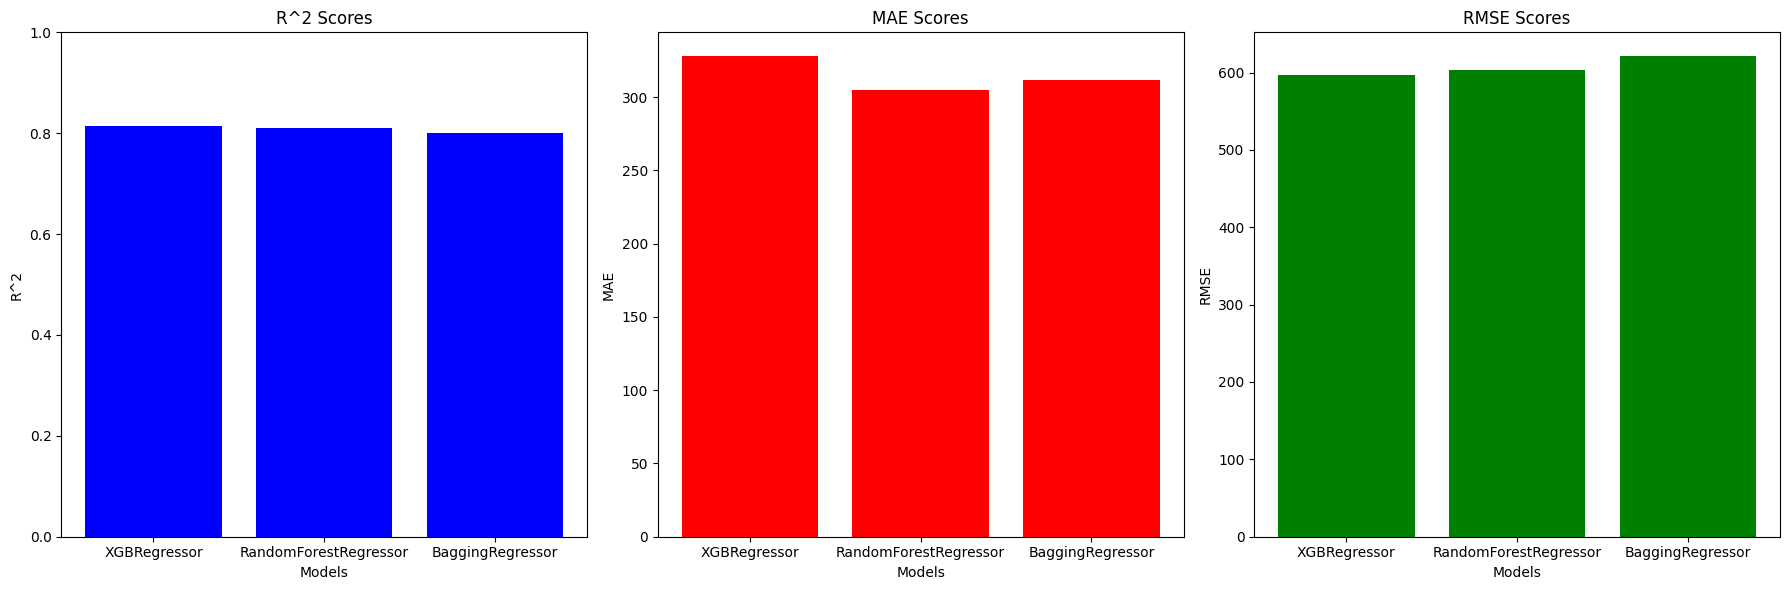

In [ ]:
top_3_models = model['model'].sort_values(by='R^2', ascending=False).head(3)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

model_names = top_3_models.index

r2_scores = top_3_models['R^2'].astype(float)
mae_scores = top_3_models['MAE'].astype(float)
rmse_scores = top_3_models['RMSE'].astype(float)

axes[0].bar(model_names, r2_scores, color='b')
axes[0].set_title('R^2 Scores')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('R^2')
axes[0].set_ylim([0, 1])

axes[1].bar(model_names, mae_scores, color='r')
axes[1].set_title('MAE Scores')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('MAE')


axes[2].bar(model_names, rmse_scores, color='g')
axes[2].set_title('RMSE Scores')
axes[2].set_xlabel('Models')
axes[2].set_ylabel('RMSE')


plt.tight_layout()
plt.show()


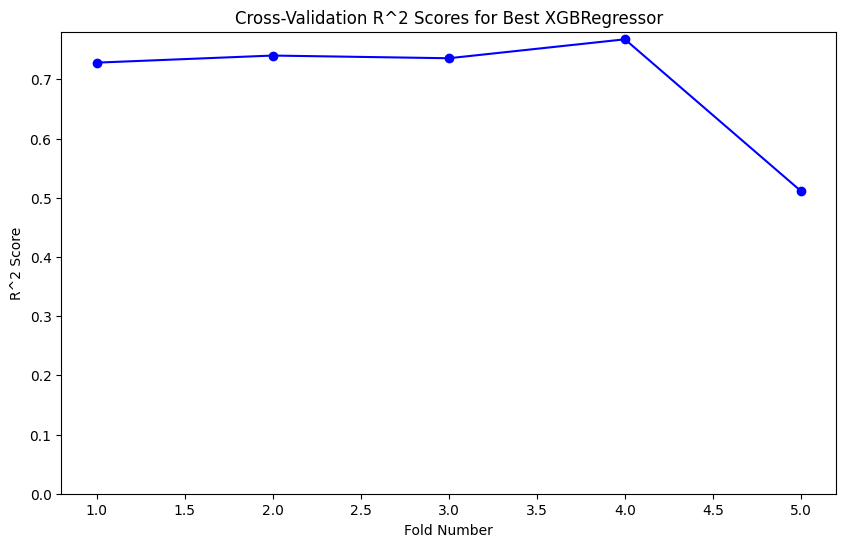

Cross-validation scores:  [0.72816458 0.74015124 0.73560095 0.76758088 0.51108665]
Mean R^2: 0.69652
Standard Deviation R^2: 0.09367


In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_pipeline = Pipeline(steps=[
    ('col_prepr', col_prepr),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
    ('model', xgb_model)
])

param_grid = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(xgb_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model_with_params = grid_search.best_estimator_

cv_scores = cross_val_score(best_model_with_params, X, Y, cv=5, scoring='r2')

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation R^2 Scores for Best XGBRegressor')
plt.xlabel('Fold Number')
plt.ylabel('R^2 Score')
plt.ylim(0)
plt.show()

print("Cross-validation scores: ", cv_scores)
print("Mean R^2: {:.5f}".format(cv_scores.mean()))
print("Standard Deviation R^2: {:.5f}".format(cv_scores.std()))

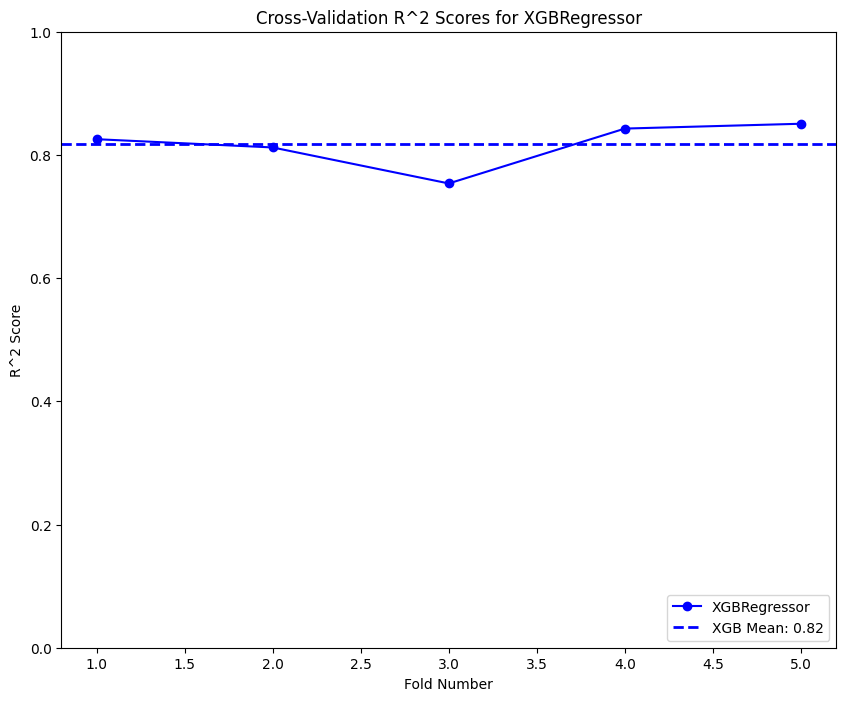

Cross-validation scores:  [0.82553097 0.81213543 0.75369634 0.84277885 0.85062715]
Mean R^2: 0.81695
Standard Deviation R^2: 0.03435


In [ ]:
numeric_features = ['depth', 'width', 'height']
categorical_features = ['category', 'designer_clean', 'other_colors']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

col_prepr = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

xgb_regr_param = {
    'n_estimators': 100,
    'max_depth': 10,
    'objective': 'reg:squarederror',
    'random_state': 42
}
xgb_model = xgb.XGBRegressor(**xgb_regr_param)

xgb_pipeline = Pipeline(steps=[
    ('col_prepr', col_prepr),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
    ('model', xgb_model)
])

cv = KFold(n_splits=5, shuffle=True, random_state=42)
score_xgb_regr = cross_val_score(xgb_pipeline, X, Y, scoring='r2', cv=cv)

res_xgb_regr = pd.DataFrame({
    'Model': 'XGBRegressor',
    'Metric': 'R^2',
    'Cross-Validation Scores': score_xgb_regr
})

mean_score_xgb_regr = np.mean(score_xgb_regr)
std_score_xgb_regr = np.std(score_xgb_regr)

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(score_xgb_regr) + 1), score_xgb_regr, color='b', marker='o', label='XGBRegressor')
plt.axhline(y=mean_score_xgb_regr, color='b', linestyle='--', linewidth=2, label=f'XGB Mean: {mean_score_xgb_regr:.2f}')

plt.title('Cross-Validation R^2 Scores for XGBRegressor')
plt.xlabel('Fold Number')
plt.ylabel('R^2 Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

print("Cross-validation scores: ", score_xgb_regr)
print("Mean R^2: {:.5f}".format(mean_score_xgb_regr))
print("Standard Deviation R^2: {:.5f}".format(std_score_xgb_regr))


In [ ]:
X1 = ikea_df[['width_1','depth_1','height_1']]
Y1 = ikea_df['price']

test1 = getBestRegressor(X1, Y1)
test1['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.73798,378.38202,710.65503
GradientBoostingRegressor,0.68628,468.68111,777.61398
DecisionTreeRegressor,0.66186,444.32348,807.31160
KNeighborsRegressor,0.64545,489.29287,826.67028
LinearRegression,0.40125,670.61205,1074.28260
RidgeCV,0.40125,670.61209,1074.28264
LassoCV,0.40117,670.70663,1074.34987
SVR,0.35166,641.01016,1117.88731


In [ ]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X1, Y1, test_size=0.2, random_state=42)
forest_grid = GridSearchCV(RandomForestRegressor(), {'n_estimators': [10,25,50,100,110,120,130, 140,150,200,500],
                                                     'max_depth': [10,20,30,40,50,100,200,None],
                                                     'max_features': ['auto','sqrt','log2']}, cv=5, n_jobs=-1, verbose=0)
forest_grid.fit(X_train, Y_train)

print('Best Estimator :',forest_grid.best_estimator_)
print('Best Score     :',forest_grid.best_score_)
print('')
print('R^2            : {:.5f}'.format(sk.metrics.r2_score(Y_test, forest_grid.predict(X_test))))
print('MAE            : {:.5f}'.format(sk.metrics.mean_absolute_error(forest_grid.predict(X_test), Y_test)))
print('RMSE           : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(forest_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('--------------------------------')

for feat, importance in zip(X_train.columns, forest_grid.best_estimator_.feature_importances_):
    print('{:.5f}    {f}'.format(importance, f=feat))

Best Estimator : RandomForestRegressor(max_depth=40, max_features='log2', n_estimators=130)
Best Score     : 0.7787471544012989

R^2            : 0.75261
MAE            : 370.89254
RMSE           : 690.53987

Feature importance:
--------------------------------
0.53881    width_1
0.24264    depth_1
0.21854    height_1


<Axes: ylabel='None'>

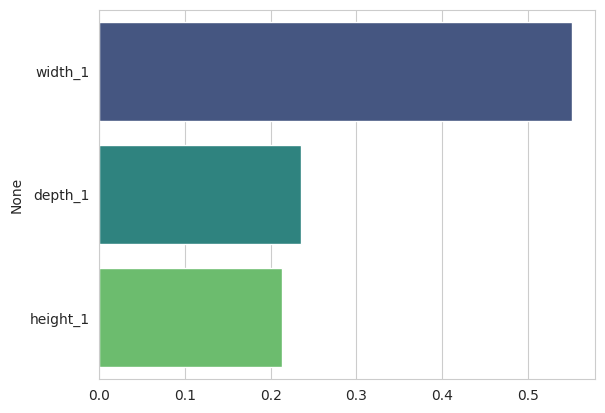

In [ ]:
sns.set_style('whitegrid')
sns.barplot(y=X_train.columns, x=forest_grid.best_estimator_.feature_importances_, palette = 'viridis')